<a href="https://colab.research.google.com/github/MWSteams/4590FSP/blob/master/Sedimentation_Hydraulic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sedimentation Hydraulic

Claudia Buchard, Emma Payne, Kevin Sarmiento

[/Monroe/]: # (Excellent! I think you missed my comments in the Executive summary and constraints sections. You have to open the text to see my comments.  You have made excellent progress. Now turn this into a linear design process if at all possible and select parameters, give ranges where there is flexibility, and make a choice. I'd suggest sharing your sed tank layout with the hydraulics team and ask them to design the channels that deliver water to each sed tank. I'm happy to chat at any time!) 


In [1]:
!pip install aguaclara
!pip install molmass

     |████████████████████████████████| 92kB 5.8MB/s 
     |████████████████████████████████| 163kB 19.6MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.1-cp36-none-any.whl size=99466 sha256=851c138bba7668193afb25504c46207d90f9599db03ddf68f4286b94a5270b9d
  Stored in directory: /root/.cache/pip/wheels/7f/ff/4f/10d76e6a261d392aefbdf6ce8d3d5519e924dc334b102ca49b
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=45022af95d4716e44c0acae5e9bd14e7d5fd375a986420a681727e920aa21000
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
     |████████████████████████████████| 71kB 4.0MB/s 


In [2]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import molmass as mol
!wget https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
import Fairmont as fmt
import math as math

--2020-05-19 03:28:15--  https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3064 (3.0K) [text/plain]
Saving to: ‘Fairmont.py’

Fairmont.py         100%[===================>]   2.99K  --.-KB/s    in 0s      

2020-05-19 03:28:16 (48.9 MB/s) - ‘Fairmont.py’ saved [3064/3064]



# Task Definition

The overall project has three main goals: 

1. To improve the source water quality of the LAAFP and lighten the burden on its filters by building a sedimentation plant upstream, 
2. To eliminate the need to operate the Cottonwood Treatment Plant and 
3. To mitigate the risk associated with arsenic sediment build up in the North Haiwee Reservoir. 

The goal of our team’s project is to design a sedimentation system with a floc blanket that can treat arsenic, TOC, and turbidity to allowable limits while maintaining high efficiency and minimizing space requirements at the treatment plant. This sedimentation system must be able to treat a design flow of 720 CFS and operate efficiently under a variety of turbidity, arsenic, TOC and emerging contaminant conditions. To complete this task we will need to decide on a set of design variables such as plan view area of the sedimentation tank, the geometry of the tank, upflow velocity, number of treatment trains, depth of the floc blanket, the physics of the diffusers in the resuspension system and the height of the floc hopper, as well as constraints for the plate settlers. With these variables decided we must then confirm that the flocculation-sedimentation system can treat the contaminants to allowable limits for various flow and concentration conditions.

# Executive Summary 




Adding a floc blanket to a sedimentation tank improves performance and decreases operational complexity by removing the need for mechanical sludge removal. The challenge of our design was to adapt AquaClara floc blanket design concepts to handle the large scale of the Fairmont Sedimentation Plant.
Our design has 4 main components: the resuspension system, the floc hopper, the plate settlers, and the hydraulics in and out of the sedimentation tank. For  the resuspension system we decided on a tiered manifold system where a big pipe feeds smaller manifold pipes which dispense the water as jets through diffusers. This design also includes a tank bottom geometry that allows for multiple sedimentation areas within one tank without additional cement walls between manifolds, which saves on planview area. There are three floc hoppers per sedimentation tank and sludge is removed from each floc hopper via a siphon. The plate settler design follows from traditional plate settlers, but with a much lower upflow velocity than would result in a mechanical sedimentation tank system. Lastly, the design of the overall sedimentation tank area includes 4 distinct treatment trains with 2 sedimentation units per train, with a redundancy of 1 sedimentation unit. This layout minimizes the overall required planview area by sharing influent and effluent channels. Overall, we designed our system to be cost-efficient and easily-operated, and this hydraulic sedimentation design shows great potential to meet all the requirements of the FSP as laid out in the scope of work.


# Constraints


Constraint information taken from [Fairmont Sedimentation Plant Scope of Work Document](file:///C:/Users/Claudia/Downloads/Fairmont%20Sedimentation%20Plant%20Scope%20of%20Work%20_FINAL%2006-01-17.pdf) and [AguaClara Textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Derivations.html#floc-blanket-design)

Relevant Regulations

* Permits required found in section X of document

* "The velocity of flocculated water through pipes or conduits to settling basins shall be no less than 0.5 nor greater than 1.5 feet per second. Allowances must be made to minimize turbulence at bends and changes in direction." [10 State Standard](https://www.health.state.mn.us/communities/environment/water/docs/tenstates/waterrev2012.pdf)


Client Expectations

* Fairmont WTP will pre-treat incoming waters from LAA1, LAA2, and SWP-E then send them to the LAAFP for final treatment. 

* Must eliminate the need for the Cottonwood Treatment Plant, thus preventing arsenic sedimentation in the North Haiwee Reservoir.

* Must be capable of treating 720 cfs

* Treatment standards: 

| Contaminant | Design Influent Water Quality  | Fairmont Sedimentation Plant Settled Water Goal | 
|---|---|---|
| Arsenic (μg/L) | 55 | 10 |
| TOC (mg/L)| 4 | 3 |
|Turbidity (NTU) | 23 | 3 |


Site

* Water system-owned Fairmont Reservoir property

* Ave H and 170th street, Lancaster, CA

* Zone A-2-2, heavy agricultural

* 250’ x 510’ proposed area for sedimentation- may want to break this constraint and use a larger area to use a smaller upflow velocity


Budget

* Estimated to cost $220 million for the whole project

process capabilities including process design equations

* See **Physics** section


Ease of Use 

* Adequate floc hopper height for easy sludge removal

Operation Requirements

* ferric chloride and a cationic polymer in flocculation

* Follows rapid mix and flocculation

* Estimated 416 hrs/year of treatment operations


Maintainence Requirements

* Walkways and platforms for easier maintenance and operation, open top for visibility

* Estimated 288 hrs/year of maintenance and construction hours

Geometry/Size Requirements

* Surface loading rate for plate settlers- 0.5 gpm/ft^2, 0.339 mm/s 

* Surface loading rate for AguaClara: 0.12mm/s

* 60 degree angle for sedimentation tank

* Sedimentation tank 7m X 1m for AguaClara

* 1/8th-¼ of an inch diffuser width minimum to make sure all particles can pass through

* Roughly less than 1cm of headless through diffusers

* 1.7 mm/s upflow velocity if we use their plan view area, may want to use 1 mm/s instead to make it comparable to AguaClara sedimentation tanks


# Physics

Our goal is to design a sedimentation tank for the LAAWTP with many of the features of an AguaClara sedimentation tank. This would include a floc blanket and the bottom geometry used in current AguaClara sedimentation tanks. However, due to the large flow rate required for this plant a few features will be modified to be more efficient with space. We are looking to increase the overall size of each sedimentation unit from the AguaClara standard of 7 meters length and 1 meter width. To do this we will design a sedimentation tank with multiple influent manifolds and jet reversers. We will optimize the overall size and number of manifolds and reversers to reduce the overall footprint and material use. 

## Manifolds and diffusers 
One of the important things we need to design are the inlet manifolds and diffusers. The following are relevant equations that we will use for the design. 

Equation 645 in [AguaClara textbook](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html?highlight=manifold#equation-sed-diffuser-jet-velocity) is used to calculate the width of a diffuser based on the design upflow velocity and sedimentation tank dimensions.

$$W_{diffuser} = \frac{V_{floc Blanket} W_{Sed} B_{Diffuser}}{V_{Jet} S_{Diffuser}} $$

The velocity of the jet from the diffuser is determined from the desired head loss. This is important because the greater the head loss at the diffusers the more uniform the flow throughout the entire length of the manifold that feeds the diffusers. 

Headloss from diffusers: 
$$H_{L\space Diffuser}= \frac{V_{Jet}^2}{2g}$$

The following equation is the ratio between port velocity and manifold velocity from [AguaClara textbook](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html?highlight=manifold#equation-manifold-max-v-no-hl-series). This is an important design equation because it ensures that we have as uniform flow as possible. Keeping flow uniform helps prevent undesired circulations in the sedimentation tank which can lead to decreased performance. Additionally, this equation will be important when designing the piping between sedimentation basins. We would want to ensure even distribution between each sedimentation units.

$$\frac{\bar v_{P}}{\bar v_{M_1}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}$$

Where $\Pi_{Q}$ is the ratio of flow between the first and last oriface in the manifold which we like to keep at around a value of 0.85. 

$$\Pi_{Q} = \frac{Q_{Diffuser \space 1 }}{Q_{Diffuser \space n }}$$



##Plate settlers
Plate settlers are important for verticle flow sedimentation tanks because they allow for greater removal efficiencies compared to vertical flow sedimentation tanks without them. The following equation is for finding length of plate settlers [AguaClara Textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Derivations.html#equation-sedimentation-sed-derivations-8) based on design parameters described below.

$$L = \frac{S\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}-1\right) + T\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}\right)}{sin\alpha cos\alpha}$$
where:
- $S$ is spacing between plates
- $T$ is the thickness of the plates
- $v_{up}$ is the upflow velocity
- $v_c$ is the capture velocity
- $\alpha$ is the angle of the plate settlers

For most of these variables we will be using the same constants that have been used in previous AguaClara plants. Some of these constants are not yet optimized and therefore require further research into how they affect overall plant performance. 

## Particle sedimentation 
To find the terminal velocity of single particles in the sedimentation tank and plate settlers we can use the following equation if the flow regime is laminar. Retrieved from [AguaClara textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Intro.html#equation-sedimentation-sed-intro-3)

$$ V_t = \frac{gD^2}{18\nu}\frac{\rho_{floc} - \rho_{H_2O}}{\rho_{H_2O}}$$

If flow is turbulent the the terminal velocity equation will be as follows: 
$$v_t = \sqrt{\frac{4}{3}\frac{gD}{C_D}\frac{(\rho_{floc}-\rho_{H_2O})}{\rho_{H_2O}}} $$ 
where $ C_D = \frac{24}{Re}(1+0.150Re^{0.681})+\frac{0.407}{1+ \frac{8710}{Re}} $

### Floc sedimentation 
To find the terminal velocity of flocs which are agrigates of primary particles we use the following equation: 
$$ v_t = \frac{D_0^2g}{18\Phi\nu}\frac{\rho_{floc_0} -\rho_{H_2O}}{\rho_{H_2O}} \left( \frac{D}{D_0} \right) ^{D_{fractal}-1} $$ Retrieved from eq. 405 in the [AguaClara Textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Intro.html#equation-sedimentation-sed-intro-6)

With this we can get an approximation of the smallest size floc that our sedimentation tank can capture. 

##Tank geometry
We will using trigonometry to optimize the bottom geometry of the sedimentation tank. 

## Floc hopper 

The development of a model for sludge accumulation in the floc hopper would be useful. This would help us make decisions about the size and storage capacity that we should plan for in the floc hopper. Additionally, it would be informative for the operators to know how often to purge the floc hopper of sludge. 

# Table listing potential strategies to meet the constraints and treatment objectives


| strategy | advantages  | disadvantages | data needed for decision |
|---|---|---|---|
| Experience + physics | high potential for success | requires knowledge | lots |
| Playing with geometry| Can lead to simple and elegant designs | Requires a lot of imagination | Clear constraints|

# Vendors and contact information file

See this [tab delimited spreadsheet](https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt).

Add rows to the vendor spreadsheet as you find them. The sheet can easily be edited in Excel. Just make sure to save it as a tab delimited sheet. Push your changes to github so the entire class has access to the document.



In [3]:
vendors = pd.read_csv('https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt',sep='\t')
vendors

,item description,vendor,contact first name,contact last name,vendor website,product info,date of contact,who made the contact,notes
0,plate settlers,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/literaturemedia/...,4/16/2020,Ian Cullings,NaN
1,sludge removal system,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/products/hoseles...,4/16/2020,Ian Cullings,NaN
2,plate settlers,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,https://www.monroeenvironmental.com/water-and-...,4/16/2020,Ian Cullings,NaN
3,sludge removal system,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,http://www.monroeenvironmental.com/water-and-w...,4/16/2020,Ian Cullings,NaN
4,plate settler with hopper,Parkson,still,pending,https://www.parkson.com/,https://www.parkson.com/products/lamella-ecoflow,4/16/2020,Ian Cullings,Includes sloped sludge hopper in design
5,Pump calibration column,McMaster Carr,still,pending,https://www.mcmaster.com/,https://www.mcmaster.com/4446K78-4446K78/,5/15/2020,Ananya Gangadhar,"20,000 mL for FeCl3 and 250 mL for polymer"
6,Eye wash stations,McMaster Carr,still,pending,https://www.mcmaster.com/safety-showers/,https://www.mcmaster.com/5557T7-5557T7,5/15/2020,Ananya Gangadhar,Meets OSHA requirements
7,Safety showers with eye wash stations,McMaster Carr,still,pending,https://www.mcmaster.com/eye-wash-stations/ans...,https://www.mcmaster.com/5568T13-5568T13,5/15/2020,Ananya Gangadhar,Meets OSHA requirements
8,40% FeCl3 solution,Brenntag,still,pending,https://us.brenntagconnect.com/,https://us.brenntagconnect.com/ccrz__ProductDe...,5/15/2020,Ananya Gangadhar,Maximize plan view area
9,Coagulant storage tank,Precision tank,Gary,Ruff,https://www.precisiontank.com/,https://www.precisiontank.com/products/fibergl...,5/15/2020,Bridget Childs,"Fiberglass tank, 12' Diameter"


# Shared assumptions

See this [python file, Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py)



# Major Decisions

The biggest challenge of this design process was that many of the variables were intertwined, so the design of one component was heavily dependent on the design of other components. Thus we followed a pretty linear decision-making process to move through the various design components.

First we decided on the orientation and layout of the sedimentation tanks. This was an important first step because the layout of the influent and effluent challenges was key to thinking about how we would design the manifolds which carry water in and out of the tank. 

Next we had to decide on the resuspension system, because the manifold/diffuser system dictated the dimensions of the sedimentation tank. We considered three main resuspension systems before settling on the final decision. We based this decision on a cost analysis. The cost analysis was very helpful to reach a decision because it was a good way to quantify the different trade-offs and combine variables to compare across designs. 

After deciding on a resuspension system we were able to calculate the dimensions of the tank. With the dimensions we were then able to design the plate settlers and effluent manifolds. 

Lastly, we decided on a floc hopper design. This design step was last because the height of the floc hopper is dependent on the height of the tank and the length of the plate settlers. Additionally, the system for removing sludge was dependent on the layout of the whole sedimentation area. 


# Design



In [4]:
print('The average flow to be treated at Fairmont is',fmt.q_ave.to(u.Mgal/u.day),'or')
print('The maximum flow to be treated at Fairmont is',fmt.q_max.to(u.Mgal/u.day))
specific_energy = (fmt.electricity_power/fmt.q_ave).to(u.J/u.L)
temp = 15 * u.degC
specific_potential_energy = (specific_energy / u.gravity / ac.density_water(temp)).to(u.m)
print('The average amount of energy used per liter of water is expected to be',specific_energy,'or',specific_potential_energy,'of potential energy')

The average flow to be treated at Fairmont is 206.8 megagallon / day or
The maximum flow to be treated at Fairmont is 465.3 megagallon / day
The average amount of energy used per liter of water is expected to be 118.1 joule / liter or 12.05 meter of potential energy


In choosing the number of sedimentation units and their size it is important to consider a few constraints. If a plant has many smaller sedimentation units then it would be cumbersome and inefficient to run them all. However, having smaller units allows operators to more precisely control the upflow velocities in the active sedimentation tanks if the total water demand increases or drops. At the other end of the spectrum, if there is a small number of very large sedimentation units then it would be easier for operators to control those few units. However, if there is a need to take one unit offline then the total production decreases at a higher percent of the total flow than with smaller units. Somewhere in between is the "ideal". Based on this notion, we propose the Fairmont Sedimentation Plant use 8 sedimentation units. To find the dimensions of each unit we must define the maximum operating upflow velocity in the sedimentation units. 

The sedimentation tanks that we are designing are vertical upflow sed tanks that will have a fluidized/suspended bed of flocs in what we call a floc blanket. The upward velocity in the sedimentation tanks will impact whether or not a floc blanket can be formed. If the upflow velocity is too high then only the very large flocs will be captured by the plate settlers, no floc blanket will form, and plant performance will drop below desired. AguaClara designs sedimentation tanks with floc blankets and upflow velocities of 1 mm/s. This design has proven to be very effective at producing effluent turbidities below 1 NTU. Given the design max flow rate of this plant and the space constrictions a higher upflow velocity is considered for sedimentation. In 2015, Casey Garland, a Ph.D. student working on floc blanket research, carried out experiments to test if higher Energy Dissipation Rates (EDR) at the injection site of the sedimentation tank affected performance. She carried out these lab scale tests at 1.2 mm/s and 1.6 mm/s upflow velocities with great performance. This is promising because it allows us to increase the maximum upflow velocity from 1mm/s to 1.6 mm/s at the Fairmont plant. 

Based on the maximum upflow velocity, maximum design flow rate of 720 cubic feet per second, and the number of units we want (8) we calculated each unit would be 40 meters long by 39.8 meters wide. It would perhaps be alright to round the dimensions out to 40 x 40 meters to make the tanks uniform. The total active sedimentation area required for all 8 units is 12,800 square meters. While this is more area than what the Scope of Work alocated for the sedimentation units, 11,850 square meters, we believe it is still feasible. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/FSP_sed_tank_top_view_1.0.JPG" height=400>
</p>
<p align="center">

**Figure 1:** A bird's-eye view of the proposed sedimentation unit with floc hopper channel visible and preliminary dimensions

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/FSP_sed_tank_side_view_1.0.JPG" height=250>
</p>
<p align="center">

**Figure 2:** A side view of the proposed sedimentation unit with floc hopper channel visible and bottom geometry

The following code illustrates how the dimensions of the tank were calculated. It also shows that this preliminary design is feasible in a number of ways. The first thing we wanted to check was the range of flow rates that this plant could operate in. We are designing the plant so that it could meet all the treatment goals at maximum capacity. However, the plant will operate at a range of different flow rates. To predict if this would be an issue we created code that allowed us to easily find the upflow velocities at different flow rates with different number of sedimentation units online. 

We saw that when the plant is operating at its average flow rate of 9.06 cubic meters per second and all sed units are in operation the resulting upflow velocity is 0.71mm/s. There is no evidence suggesting a floc blanket could not form at this slower velocity. However, we were concerned that the reduced flow rate in each tank would make it more difficult for the jet reverser to resuspend settling flocs and as a result begin to fill with sludge. This would be a failure mode and we want to avoid this. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/screenshot_jet_reverser_Garland_2015.JPG" height=250>
</p>
<p align="center"> 

**[(Garland, 2015)](https://www.researchgate.net/publication/287358758_Influence_of_Variable_Inlet_Jet_Velocity_on_Failure_Modes_of_a_Floc_Blanket_in_a_Water_Treatment_Process_Train)**

Casey Garland examined this failure mode in her Ph.D thesis and concluded that in order to prevent flocs from filling up the jet reverses an Energy Dissipation Rate (EDR) above ~1 mW/kg was desired. Additionally, it was also suggested that EDR should not increase above 300 mW/kg as plant performance started to drop after that point. 

$$\varepsilon_{Max} = \Pi_{Jet}\frac{   \bar v_{Jet} ^3}{D_{Jet}}$$

Where $\Pi_{Jet \space Round} = 0.08$ and $\Pi_{Jet \space Plane} = 0.0124$

[AguaClara textbook](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#id17)



<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/jet_reverser_Garland_2015.JPG" height=300>
</p>
<p align="center">

We will use this as a design constraint as we move towards the design of the diffusers and jet reversers. 

[/Monroe/]: # (I contend that the failure to resuspend the settled flocs is due to a lack of momentum. Thus I'd take the case that Casey described as failing and find the jet momentum per plan view area of the sedimentation tank. I think this simplifies to a minimum velocity that is required to resuspend the settled flocs. I think this minimum velocity is independent of the sed tank valley width. This minimum velocity IS a function of the floc blanket concentration and thus at the minimum flow for a sed tank the floc blanket will be more concentrated AND the jet velocity will be reduced. Thus the critical design for the jet velocity is at the minimum flow rate.)

In [5]:
# calculations for finding size of sedimentation unit based on the number sed 
# units desired for the entire plant 

max_V_up = 1.6*u.mm/u.s
length_sed_unit = 30*u.m
max_num_sed_units = 16
width_sed_unit = fmt.q_max / (max_V_up * length_sed_unit *max_num_sed_units)
print('Based on limiting parameters the sedimentation tank dimensions are: Length-' +str(length_sed_unit.to(u.m)) +
      ' and width-'+ str(width_sed_unit.to(u.m)) )

area_sed_tanks = (length_sed_unit * width_sed_unit * max_num_sed_units).to(u.m**2)
planned_area_fairmont = (250 * 510 *u.feet**2).to(u.meter**2) # From Scope of Work 
print ('Total active area for hydraulic sed tank design is '+str(area_sed_tanks) + ' while the planned are was '+str(planned_area_fairmont))

Q_max_sed_hydraulic_unit = (1.6*u.mm/u.s * length_sed_unit * width_sed_unit).to(u.megagallon/u.day)
print('Each sedimentation unit can treat up to '+str(Q_max_sed_hydraulic_unit))

# This function calculates the upflow velocity of all the sedimentation basins 
# that are online based on plant total flow rate and the number of sedimentation
# units online at that moment. This is useful because we would want to ensure that 
# we can meet peak and average demand and do it while staying between a min and max 
# upflow velocity. 

def upflow_velo_sed(Q ,num_sed_units, length_sed_unit,width_sed_unit ):
  return (Q / ( num_sed_units *length_sed_unit * width_sed_unit)).to(u.mm/u.s)

num_sed_units = 8 # This value can be changed to see how removing sed units affects upflow velo in the other tanks and the EDR at the jet reverser 
Q_example = fmt.q_ave.to(u.m**3/u.s)
V_up_sed = upflow_velo_sed( Q_example, num_sed_units, length_sed_unit , width_sed_unit)
print ('When the plant flow rate is '+str(Q_example) +' and '+str (num_sed_units)+
       ' out of '+str(max_num_sed_units)+ 
       ' sedimentation tanks are online, then the upflow velocity in those tanks is ' +str(V_up_sed))


# Jet reverser Energy Dissipation Rate
# Perhaps this could be used as a constraint. 
# if EDR gets too low, we can have issues resuspending flocs and an accumulation of 
# sludge can occur at the bottom of the tank 
# Garland et al show good performace at every EDR except 0.25 mW/kg due to the jet reverser 
# becoming filled. The next EDR sucessfully tested was ~1mW/kg. This will be set as the minumum for our design

# function to calculate the EDR from a jet reverser: from Garland 2015 
def EDR_jet(pi_jet , upflow_velo_sed , width_jet, width_section):
  V_jet = width_section * upflow_velo_sed / width_jet  # velocity of the reversed jet  
  return (pi_jet* ((V_jet)**3 / width_jet)).to(u.milliwatt/u.kg)



pi_jet_circular = 0.5
pi_jet_plane = 0.23 # from Garland 2015 
width_jet = 10*u.mm # this is determined by the diameter or width of the diffuser oriface which we can change
width_section = 1.5*u.meter # spaceing between jet reversers is adjustable: traditional AC plants it is 1 meter
EDR_sed_unit = EDR_jet(pi_jet_plane , V_up_sed , width_jet, width_section)

print ('For a sed tank with upflow velo of '+str(V_up_sed)+' sectional width of '+ 
       str(width_section)+' and jet width of '+str(width_jet)+' the EDR is '+str(EDR_sed_unit))


Based on limiting parameters the sedimentation tank dimensions are: Length-30 meter and width-26.55 meter
Total active area for hydraulic sed tank design is 1.274e+04 meter ** 2 while the planned are was 1.185e+04 meter ** 2
Each sedimentation unit can treat up to 29.08 megagallon / day
When the plant flow rate is 9.061 meter ** 3 / second and 8 out of 16 sedimentation tanks are online, then the upflow velocity in those tanks is 1.422 millimeter / second
For a sed tank with upflow velo of 1.422 millimeter / second sectional width of 1.5 meter and jet width of 10 millimeter the EDR is 223.3 milliwatt / kilogram


## Size of Manifolds


As a reality check we will be calculating the diameter of the manifolds that supply water to the sedimentation tanks. Traditional AguaClara plants are about 6 meters long but our proposed sedimentation tanks are 40 meters long. This means that each trunk of a sedimentation manifold must supply a much larger quantitiy of water and therefore will have a larger diameter. If those diameters get too large they can take up a large fraction of the sedimentation unit itself and that could become a failure mode. 

This analysis begins with the following equation which describes the ratio between the velocity leaving the ports, $\bar v_{P}$ , and the velocity in the manifold, $\bar v_{M_{1}}$ . This equation assumes that the head loss due to friction in the pipe is small. 

$$\frac{\bar v_{Jet}}{\bar v_{M_1}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}$$
From [AguaClara Textbook Equation 643](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html#equation-manifold-max-v-no-hl-series)

Where $ \Pi = \frac{Q_{port \space 1}}{Q_{port \space n}} $ which describes the ratio of flow between the first and last ports on the manifold. AguaClara typically uses 0.85 in their designs and that has shown great results. 

The velocity of the flow out of the diffuser will be set by the desired upflow velocity in the sedimentation tank($\bar v_{FB}$), the width of the section which the manifold supplies water to ($ W_{Sed  \space section}$), and the width of the diffusers ($W_{Diffuser}$).

<p align="center">
  <img src="https://aguaclara.github.io/Textbook/_images/BvsS_diffuser.png" height=150>
</p>
<p align="center">


$$\bar v_{Jet}  = \frac{\bar v_{FB} W_{Sed  \space section} B_{Diffuser}}{W_{Diffuser} S_{Diffuser}}$$
from [AguaClara Textbook Equation 645](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html#equation-sed-diffuser-jet-velocity) 

If the thickness of the diffuser wall is small then we can simplify the equation to: 

$$\bar v_{Jet}  = \frac{\bar v_{FB} W_{Sed  \space section} }{W_{Diffuser} }$$
and now solve for the velocity in the manifold as a function of velocity of the jet and the ratio of flows shown above: 

$$v_{Manifold} = \frac {v_{Jet}}{\sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}}$$

[/Monroe/]: # (I edited the previous equation to make it explicitly a function of the flow ratio.)

To find the diameter of the manifold we now relate the required flow rate in the section to the calculated velocity in the manifold. 

$$Q_{Sed\space section} = L_{Sed} W_{sed \space section} V_{up}$$
$$D_{Manifold} = \sqrt{\frac{4 Q_{Sed\space section}}{\pi v_{Manifold}}}$$

The following code outputs a direct comparisson between the FSP design and a traditional AC design. Three main design perameters are compared: manifold diameter, ratio between manifold diameter and the width of the sedimentation portion which that manifold serves, and head loss in the manifold. 

The head loss in the diffusers sets the width of the diffusers
$$v_{Jet} = \sqrt{2gH_L}$$
$$W_{sed \space section}  = \frac{ v_{Jet}W_{diffuser}}{v_{FB}}$$


In [6]:
# last edit made on 5/5/20
def Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow):
  return np.sqrt((Ratio_flow**2 + 1)/(2*(1-Ratio_flow**2)))


def volume_valleys(slope_angle, width_valley , length_sed_active, n_valleys, diam_half_pipe):
  """Returns the volume of concrete needed to construct the valley geometry of an
  AguaClara type sedimentation tank
  """
  
  hight_peaks_sed = np.tan(slope_angle)*((width_valley - diam_half_pipe)/2)
  volume_concrete_sed = (hight_peaks_sed /2) * length_sed_active * width_valley *n_valleys
  return volume_concrete_sed.to(u.m**3)


def sch40_pipe(ID):
    """Return the ID and OD of closest available sch 40 pipe that
    is larger than the desired ID. 
    This assumes that the input ID is the smallest ID required. 

    Grabs data from the AguaClara pipe_database file 
    """
    ID = ID.to(u.inch).magnitude
    difference_array = np.array((ac.pipedb['ID_SCH40']) - (ID))
    for i in range(len(ac.pipedb['ID_SCH40'])):
      if difference_array[i]<0 or ac.pipedb['Used'][i] == 0: # pipes that are smaller than required and pipes that are not labeled as "used" are ignored 
        difference_array[i]=1000

    myindex = (difference_array).argmin()
    closest_OD = (ac.pipedb.iloc[myindex, 3]) * u.mm
    closest_ID = (ac.pipedb.iloc[myindex, 6]) * u.inch
    return closest_ID, closest_OD



def mass_pipe(density_material , ID ,OD , length_pipe):
  """Returns the total mass of a pipe as a functiong of it's 
  thickness, length and density
  """
  volume_pipe = (np.pi / 4) * (OD**2 - ID**2) * length_pipe
  mass_pipe = (density_material * volume_pipe).to(u.kg)
  return mass_pipe

def manifold( v_up , W_diffuser_jet , length_sed , Ratio_flow, HL_diff, pi_jet):
  max_jet_vel = ((2*u.gravity*HL_diff)**(0.5)).to(u.m/u.s) # velo of the jet determined by desired HL 
  width_section_eq = (( max_jet_vel * W_diffuser_jet ) / v_up)
  v_Influent_Manifold = max_jet_vel / Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow)
  Q_section =(length_sed * width_section_eq * v_up)
  ID_min_Influent_Manifold = ac.diam_circle(Q_section/v_Influent_Manifold) # this is the actual minimum diameter
  EDR = (pi_jet* ((max_jet_vel)**3 / W_diffuser_jet)).to(u.milliwatt/u.kg)

  # the following function finds the SCH40 pipe that would satisfy this constrain 
  manifold_info = sch40_pipe(ID_min_Influent_Manifold)
  manifold_ID = manifold_info[0]
  manifold_OD = manifold_info[1]
  return  manifold_ID, Q_section.to(u.L/u.s) , width_section_eq.to(u.inch) , manifold_OD, EDR


Nu = ac.viscosity_kinematic_water(temp)
max_V = 1.6*u.mm/u.s
length_sed_unit_FSP = 20*u.m # optimization variable 
width_diffuser_FSP = 4*u.mm # optimization variable

pi_jet = 0.0124
Ratio_flow = 0.85 # based on flow of first and last port in diffuser 
W_Diffuser = 3 * u.mm # This is the width of traditional AC plant's diffusers 
v_FB = 1 * u.mm/u.s # upflow velo of traditional AC plant 

L_Sed_AC = 6*u.m # Length of traditional sed tank 
Roughness = 0.002*u.mm # PVC pipe roughness
KMinor_manifold = 2 

# set the head loss in the diffusers to a constant and then use that to calculate the velo out of jet 
HL_diff_AC = 1*u.cm
HL_diff_FSP = 1*u.cm

manifold_FSP = manifold( max_V , width_diffuser_FSP, length_sed_unit_FSP  , Ratio_flow, HL_diff_FSP ,pi_jet )
manifold_AC = manifold( v_FB , W_Diffuser , L_Sed_AC  , Ratio_flow, HL_diff_AC, pi_jet)
# based on the flow and the head loss constrain the width of the diffuser is determined
W_sed_AC = manifold_AC[2]
W_sed_FSP = manifold_FSP[2]

## to test feasability I want to check what percent of the sed width is traversed by the manifold 

ratio_manifold_sed_AC = (manifold_AC[0] / W_sed_AC).to(u.dimensionless)
ratio_manifold_sed_FSP = (manifold_FSP[0] / W_sed_FSP).to(u.dimensionless)

# number of diffusers based on standard AC diffuser width design 
diffuser_width = 5*u.cm # based on aproximate AC design 
n_diffusers_AC = (L_Sed_AC / diffuser_width).to(u.dimensionless)
n_diffusers_FSP = ( length_sed_unit_FSP/ diffuser_width).to(u.dimensionless)

# Head loss in manifold function from AC Core 

head_loss_manifold_AC_2 = ac.headloss_manifold(manifold_AC[1], manifold_AC[0], L_Sed_AC , KMinor_manifold, Nu, Roughness, n_diffusers_AC )
head_loss_manifold_FSP_2 = ac.headloss_manifold(manifold_FSP[1], manifold_FSP[0], length_sed_unit_FSP, KMinor_manifold, Nu, Roughness, n_diffusers_FSP )


print('Diameter manifold in AC plant is '+str(manifold_AC[0])+', flow rate of '+str(manifold_AC[1])+
      ', manifold to sed tank width ratio '+str(ratio_manifold_sed_AC)+' and headloss of '+str(head_loss_manifold_AC_2.to(u.cm)) )
print('Diameter manifold in FSP plant is '+str(manifold_FSP[0])+', flow rate of '+str(manifold_FSP[1])+
      ', manifold to sed tank width ratio '+str(ratio_manifold_sed_FSP)+' and headloss of '+str(head_loss_manifold_FSP_2.to(u.cm)) )

# What amount of head loss in the manifold is acceptable? Should we try to keep the head loss as low as in the AC designs? 
# if we do that then we can set the head loss in diam_manifold_FSP equal to head_loss_manifold_AC_2
# more head loss in the pipe could probably help flow distribution and counter the pressure recovery 

Diameter manifold in AC plant is 7.981 inch, flow rate of 7.972 liter / second, manifold to sed tank width ratio 0.1526 dimensionless and headloss of 0.2765 centimeter
Diameter manifold in FSP plant is 17.25 inch, flow rate of 35.43 liter / second, manifold to sed tank width ratio 0.3957 dimensionless and headloss of 0.2669 centimeter


The code above only looks at one specific sedimentation tank with a specified length, width, and diffuser head loss. 

In the analysis below the independent variables are the width of the valleys, the length of the sedimentation tank, and the head loss at the diffuser. The code outputs six graphs with the following information:

1. Diameter of the manifold
2. Ratio between manifold diameter and the width of the sedimentation portion which that manifold serves 
3. Head loss in the manifold 
4. Energy Dissipation Rate leaving the diffusers
5. Total mass of PVC required 
6. Total volume of filler material required for valleys 
7. Total cost of PVC and concrete 

 
A constraint has been added to remove any configuration that results in a jet diffuser width less than 3mm. Anythings smaller than 3 mm could pose a risk to clogging. This constraint can be revised if we get feedback that it should be bigger or smaller. 

The cost analysis reflected in this code makes a few key assumptions. The first is that the material used to make the valleys is concrete. From the scope of work we determined that 1 cubic yard of concrete was worth $300 USD. Volume of concrete was 

 Additionally, we assumed that the piping used was PVC schedule 40 pipes. From this we found the required inner diameter based on the constrains and the matching outer diameter. The volume of PVC used was determined by the following relation: 

$$\rlap{-}V_{PVC} = \frac{\pi (D_{Outter}^2 -D_{Inner}^2)}{4} L_{Sed} n_{Manifolds}$$
 

In [7]:
# in the Scope of Work page 43 they estimate that 1 feet of 8" ND PVC pipe will cost 14 USD 
# We are assuming the pipe used is schedule 40 and based on the ID and OD of 8" ND schedule 40 finding the mass
# of the pipe and then finding the cost per kg of this PVC pipe. 
# This is used in the following calculations to estimate the total cost of PVC 
density_PVC=	1.38*(u.g/u.cm**3)
mass_8_inch_PCV_pipe = (mass_pipe(density_PVC ,7.981*u.inch ,8.625*u.inch, 1*u.feet)).to(u.pound)
price_per_pound_PVC =  (14*u.USD) / mass_8_inch_PCV_pipe 
print('Estimated price of PVC is ',price_per_pound_PVC)

Estimated price of PVC is  2.786 dollar / pound


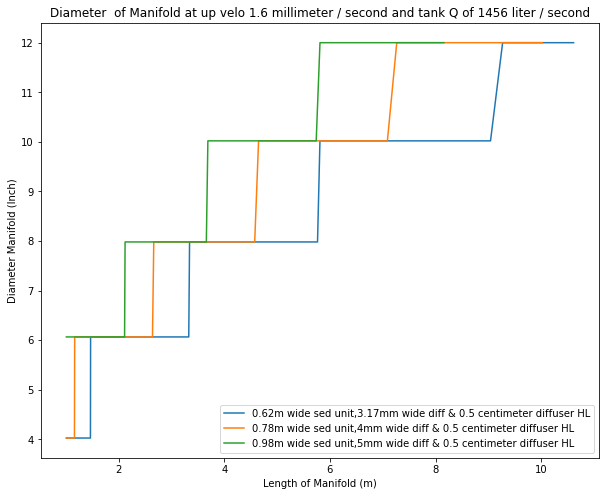

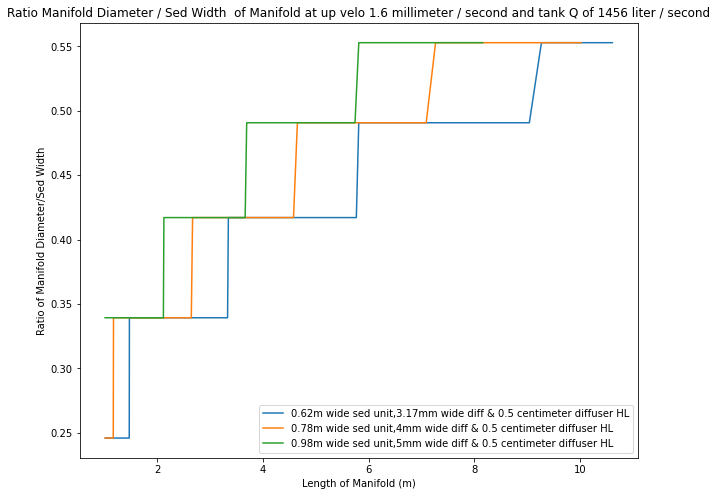

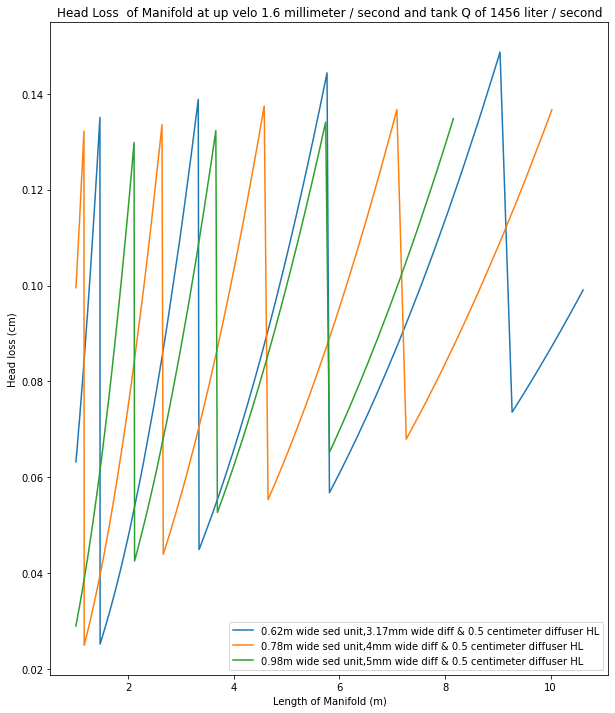

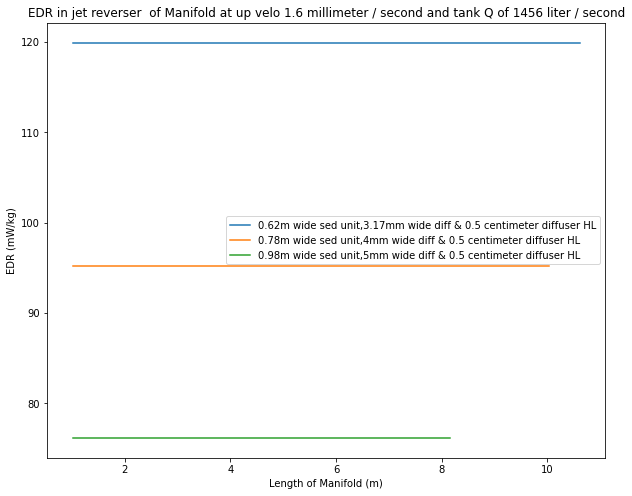

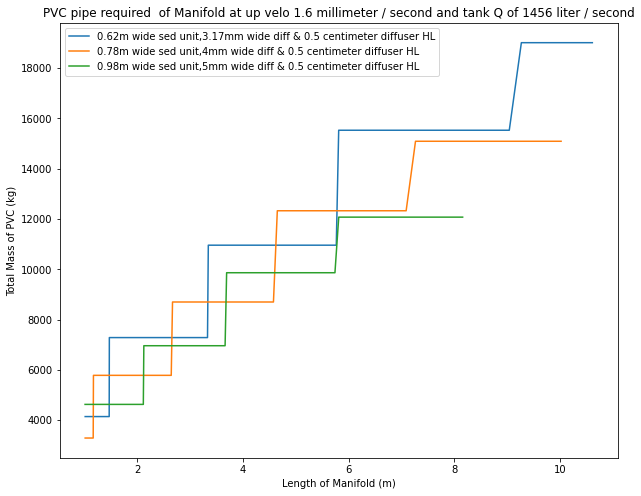

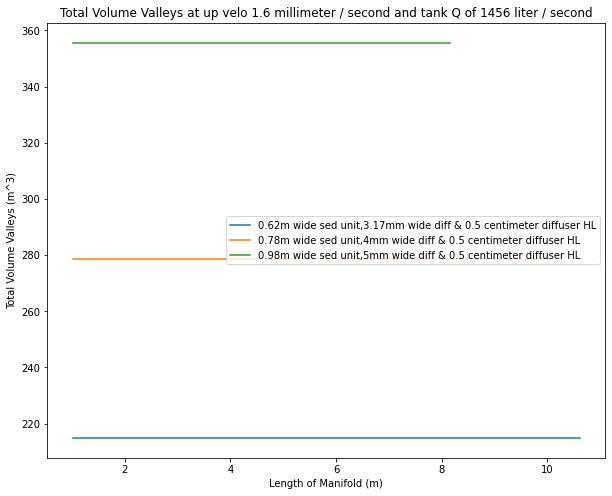

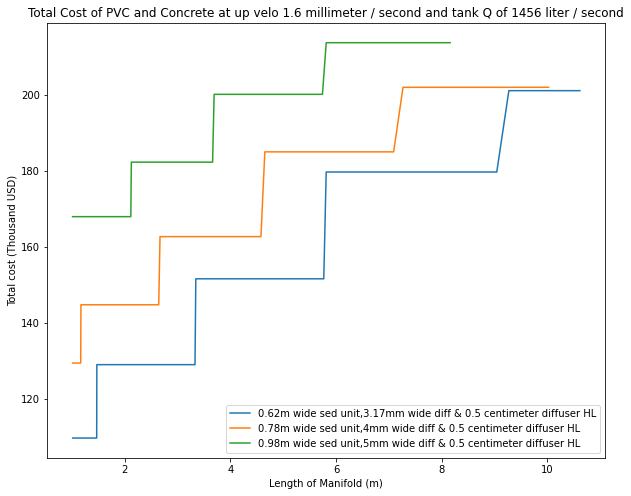

In [8]:
# last edit 5/5/20
#### Plotting different manifold characteristics for manifolds with AguaClara like diffusers
#calculate diameter, flow rate and head loss for a range of manifold lengths, widths, and diffuser head losses

# This is on a per tank scale. So total cost reflect the total cost of building one of the 16 tanks with these characteristics

def manifold_parameter_graph( V_up_FB ,Ratio_flow , HL_diffuser ,KMinor_manifold , Nu, Roughness, Q_sed_tank):
  for width_diffuser in [3.175*u.mm , 4*u.mm , 5*u.mm]:
    # np.arange(3,9,3)*u.mm
    # pi jet in Casey Garland's 2015 paper is 0.23 for a plane jet???
    pi_jet = 0.0124 # https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#id17 
    slope_angle = 60*u.degree
    density_PVC=	1.38*(u.g/u.cm**3)
    cost_concrete = 300*(u.USD/u.yard**3) # Scope of work page 43 
    price_per_pound_PVC = 2.786*u.USD/u.pound
    diam_half_pipe = 3*u.inch
    diffuser_length = 5*u.cm
    D =[] 
    lengths=[]
    headloss=[]
    Q=[]
    EDR = []
    manifold_sed_ratio = []
    volume_bottom_geometry = [] # in m^3
    total_mass_PVC_manifold = []
    cost_PVC_and_concrete = []

    max_jet_vel = ((2*u.gravity*HL_diffuser)**(0.5)).to(u.m/u.s) # velo of the jet determined by desired HL 
    w_sed_unit = (( max_jet_vel * width_diffuser ) / V_up_FB).to(u.m)
    energy_diss_rate = (pi_jet* ((max_jet_vel)**3 / width_diffuser)).to(u.milliwatt/u.kg)

    list_n_manifolds = []
    for i in np.arange(round(85/w_sed_unit.magnitude),round(900/w_sed_unit.magnitude), round(2/w_sed_unit.magnitude)):
      if i% 2 == 0:
        list_n_manifolds.append(i)
      else:
        correction = i+1
        list_n_manifolds.append(correction)

    if energy_diss_rate <= 300*u.milliwatt/u.kg and energy_diss_rate >= 1*u.milliwatt/u.kg: 

      for n_manifolds in list_n_manifolds:
        # I opt for looping through different number of manifolds and using that to calculate the lengths of the manifolds using the conservation of mass 
        # This allows to have the number of manifolds to later use to make cost estimates 
        length_sed = (Q_sed_tank / (V_up_FB * w_sed_unit *n_manifolds)).to(u.m)
        v_Influent_Manifold = max_jet_vel / Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow)
        Q_section =(length_sed * w_sed_unit * V_up_FB).to(u.l/u.s)
        ID_min_Influent_Manifold = ac.diam_circle(Q_section/v_Influent_Manifold) # this is the actual minimum diameter
        manifold_info = sch40_pipe(ID_min_Influent_Manifold)
        manifold_ID = (manifold_info[0]).to(u.inch)
        manifold_OD = (manifold_info[1]).to(u.inch)

        n_diffusers = round(( length_sed/ diffuser_length).to(u.dimensionless))
        hl = ((ac.headloss_manifold(Q_section, manifold_ID, length_sed, KMinor_manifold, Nu, Roughness, n_diffusers )).to(u.cm)) # hl in cm
        width_sed_active = w_sed_unit * n_manifolds
        volume_bottom = (volume_valleys(slope_angle, w_sed_unit , length_sed , n_manifolds, diam_half_pipe)).to(u.m**3)
        total_length_pipe = length_sed * n_manifolds
        mass_PVC = (mass_pipe(density_PVC , manifold_ID, manifold_OD , total_length_pipe)).to(u.kg)
        material_cost = ((volume_bottom*cost_concrete) + (mass_PVC *price_per_pound_PVC)).to(u.kiloUSD)

        length_diffuser = 10*u.inch
        manifold_height = (1.1*length_diffuser) + (0.5*manifold_OD) # finding how far from the floor the manifold is 
        height_valley = np.tan(slope_angle)*((w_sed_unit - diam_half_pipe)/2) # the height of the peaks 
        if manifold_height < height_valley:
          width_available_at_manifold_height = (2*(manifold_height/np.tan(slope_angle))) + diam_half_pipe
          manifold_sed_ratio_1 = (manifold_OD / width_available_at_manifold_height).to(u.dimensionless)
        else:
          manifold_sed_ratio_1 = (manifold_OD /w_sed_unit).to(u.dimensionless)
        
        max_manifold_to_wall_ratio = 0.6 # this is a measure of how much area the manifold tanks up in the sed tank
        if manifold_sed_ratio_1 < max_manifold_to_wall_ratio:
          lengths.append(length_sed.magnitude) # (in meters)
          D.append(manifold_ID.magnitude) # (in inches)
          Q.append(Q_section.magnitude) # (in L/s)
          manifold_sed_ratio.append(manifold_sed_ratio_1)
          headloss.append(hl.magnitude) # in cm
          EDR.append(energy_diss_rate.magnitude) # in mW/kg
          volume_bottom_geometry.append(volume_bottom.magnitude) # in m^3
          total_mass_PVC_manifold.append(mass_PVC.magnitude) # in kg
          cost_PVC_and_concrete.append(material_cost.magnitude) # in Thousand USD

        else:
          lengths.append(None) # (in meters)
          D.append(None) # (in inches)
          Q.append(None) # (in L/s)
          manifold_sed_ratio.append(None)
          headloss.append(None) # in cm
          EDR.append(None) # in mW/kg
          volume_bottom_geometry.append(None) # in m^3
          total_mass_PVC_manifold.append(None) # in kg
          cost_PVC_and_concrete.append(None) #

    plt.figure(1,[10,8])
    string = str(round(w_sed_unit.magnitude,2))+'m wide sed unit,' +str(round(width_diffuser.magnitude,2))+'mm wide diff & '+str(HL_diffuser)+' diffuser HL'
    title_2 = ' of Manifold at up velo '+str(V_up_FB.to(u.mm/u.s)) +' and tank Q of '+str(Q_sed_tank.to(u.l/u.s))
    plt.plot(lengths,D,label=string)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('Diameter Manifold (Inch)')
    plt.title('Diameter '+ title_2)
    plt.legend()
      
    plt.figure(2,[10,8])
    plt.plot(lengths,manifold_sed_ratio,label=string)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('Ratio of Manifold Diameter/Sed Width')
    plt.title('Ratio Manifold Diameter / Sed Width '+ title_2)
    plt.legend()

    plt.figure(3,[10,12])
    plt.plot(lengths,headloss,label=string,)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('Head loss (cm)')
    plt.title('Head Loss '+ title_2)
    plt.legend()

    plt.figure(4,[10,8])
    plt.plot(lengths,EDR,label=string,)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('EDR (mW/kg)')
    plt.title('EDR in jet reverser '+ title_2)
    plt.legend()

    plt.figure(5,[10,8])
    plt.plot(lengths,total_mass_PVC_manifold,label=string,)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('Total Mass of PVC (kg)')
    plt.title('PVC pipe required '+ title_2)
    plt.legend()

    plt.figure(6,[10,8])
    plt.plot(lengths,volume_bottom_geometry,label=string,)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('Total Volume Valleys (m^3)')
    plt.title('Total Volume Valleys at up velo '+str(V_up_FB)+' and tank Q of '+str(Q_sed_tank.to(u.l/u.s)))
    plt.legend()

    plt.figure(7,[10,8])
    plt.plot(lengths,cost_PVC_and_concrete,label=string,)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('Total cost (Thousand USD)')
    plt.title('Total Cost of PVC and Concrete at up velo '+str(V_up_FB)+' and tank Q of '+str(Q_sed_tank.to(u.l/u.s)))
    plt.legend()

n_tanks= 16
redundant_tanks = 2
q_tank = (fmt.q_max / (n_tanks - redundant_tanks)).to(u.feet**3/u.s) 
# Running the function for various head loss values. The values can be changed 
for i in  [0.5*u.cm]:
  manifold_parameter_graph(max_V_up ,Ratio_flow , i, KMinor_manifold , Nu, Roughness , q_tank)

In [9]:
n_tanks= 16
redundant_tanks = 2
q_tank = (fmt.q_max / (n_tanks - redundant_tanks)).to(u.feet**3/u.s) 
# Running the function for various head loss values. The values can be changed 
HL_diffuser = 0.5*u.cm
width_diffuser =3.175*u.mm 
pi_jet = 0.0124 # https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#id17 
slope_angle = 60*u.degree
density_PVC=	1.38*(u.g/u.cm**3)
cost_concrete = 300*(u.USD/u.yard**3) # Scope of work page 43 
price_per_pound_PVC = 2.786*u.USD/u.pound
diam_half_pipe = 3*u.inch
diffuser_length = 5*u.cm
max_jet_vel = ((2*u.gravity*HL_diffuser)**(0.5)).to(u.m/u.s) # velo of the jet determined by desired HL 
w_sed_unit = (( max_jet_vel * width_diffuser ) / max_V_up).to(u.m)
energy_diss_rate = (pi_jet* ((max_jet_vel)**3 / width_diffuser)).to(u.milliwatt/u.kg)
for n_manifolds in reversed(np.arange(round(85/w_sed_unit.magnitude),round(900/w_sed_unit.magnitude), round(2/w_sed_unit.magnitude))):
  length_sed = (q_tank / (max_V_up* w_sed_unit *n_manifolds)).to(u.m)
  print(length_sed , n_manifolds)

1.014 meter 1445
1.016 meter 1442
1.018 meter 1439
1.02 meter 1436
1.022 meter 1433
1.024 meter 1430
1.026 meter 1427
1.029 meter 1424
1.031 meter 1421
1.033 meter 1418
1.035 meter 1415
1.037 meter 1412
1.04 meter 1409
1.042 meter 1406
1.044 meter 1403
1.046 meter 1400
1.048 meter 1397
1.051 meter 1394
1.053 meter 1391
1.055 meter 1388
1.058 meter 1385
1.06 meter 1382
1.062 meter 1379
1.064 meter 1376
1.067 meter 1373
1.069 meter 1370
1.071 meter 1367
1.074 meter 1364
1.076 meter 1361
1.079 meter 1358
1.081 meter 1355
1.083 meter 1352
1.086 meter 1349
1.088 meter 1346
1.091 meter 1343
1.093 meter 1340
1.096 meter 1337
1.098 meter 1334
1.1 meter 1331
1.103 meter 1328
1.105 meter 1325
1.108 meter 1322
1.11 meter 1319
1.113 meter 1316
1.116 meter 1313
1.118 meter 1310
1.121 meter 1307
1.123 meter 1304
1.126 meter 1301
1.128 meter 1298
1.131 meter 1295
1.134 meter 1292
1.136 meter 1289
1.139 meter 1286
1.142 meter 1283
1.144 meter 1280
1.147 meter 1277
1.15 meter 1274
1.152 meter 1271
1.15

### Observations of the graphs
If you take a look at the first group of graphs, the one that looks at the diameter of the manifold, we actually see that you can increase the width of the valley without increasing the diameter significantly. In fact, in some scenarios a wider valley led to a smaller ratio between diameter of the pipe and tank width. This would translate to less pipe used in the entire system. However, a wider valley would translate to higher peak which would require more concrete. We have not factored in the added concrete needed if we increase the width of the valleys. 

The constraint that we put on the graph to ensure the width of the diffuser was not smaller than 3mm also had important implications. We can see that as the desired head loss in the diffuser increases, the valley width needed to ensure the diffuser width is larger than the constraint also increases. 1 cm head loss at the diffuser can be obtain with valley widths larger than 1 m. However, to obtain a head loss of 3 cm the valleys have to be larger than 1.5 m wide and for 5 cm head loss the valley needs to be nearly 2 m wide. 

The graph showing the ratio of the manifold diameter to sed width is helpful for putting the diameters of the manifold into context. The horizontal black line is the manifold diameter:sed width ratio in typical AC plants. A smaller ratio translates to less total pipe length used in all the sedimentation basins.

The last two graphs are an attempt to weigh the pros and cons of changing the width of the valleys. From a start we knew that increasing valley width would require more concrete. This is assuming that the bottom of this tank is made out of concrete. There is an arguement to make that we could suggest making the bottom geometry out of other materials. 







# Alternative diffuser approach 
## Derivation of equations for design
#### Reasoning for doing alternative 

- Previous analysis shows that wider valleys requires much more filler material such as concrete. 
- With the previous diffuser design it was not possible to obtain higher diffuser head losses without increasing the width of the valleys
- Total costs were high 

This new approach will use small holes cut into a PVC slab to act as diffusers. This allows for higher head loss in the diffusers because the total area of the diffusers is lower which increases the jet velocity. This also means that the velocity in the manifold can increase as well which in turn means that a smaller diameter manifold can be used. This could help significantly reduce material cost. 


<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/new_diffuser_design.JPG" height=100>
</p>
<p align="center">

**Figure 4** Diffuser schematic where the blue represents the diffuser ports and the rectangular slab as a continuous piece of PVC.

This analysis begins at the scale of a single diffuser with conservation of mass. 
$$Q_{diffuser} = \frac{Q_{Manifold}}{n_{Diffusers}}$$

$$Q_{diffuser} = v_{Jet \space Diffuser}\frac{\pi D_{Diffuser}^2}{4}$$

Like in the previous analysis we will be setting the head loss, $h_L$, in the diffuser to find of the velocity of the jet leaving the diffuser. 

$$ v_{Jet \space Diffuser} = \sqrt{2gh_L}$$

We can now solve for $Q_{Manifold}$ in two forms. The first by combining the above equations and second with a statement of conservation of mass. 

$$ Q_{Manifold} = \frac{\sqrt{2gh_L}\pi D_{Diffuser}^2 n_{Diffusers}}{4}$$

$$ Q_{Manifold} = L_{Manifold}W_{Valley}v_{FB}$$

In our previous manifold design our independent variables for finding the diameter of the manifold were the width of the valleys, the length of the sed tanks, and the desired head loss of the diffusers. In this analysis we will use the diameter of the diffusers, length of the sed tanks, and desired head loss at the diffusers as the independent variables. We believe the constraints on the diffuser diameters are clearer and actually help us find a better design. 

If we combine the two expressions for $Q_{Manifold}$ and solve for $W_{Valley}$ we get the following expression: 
$$ W_{Valley} = \frac{\sqrt{2gh_L}\pi D_{Diffuser}^2 n_{Diffusers}}{4L_{Manifold}v_{FB}}$$

The next step is to find $n_{Diffusers}$ from the geometry of the diffusers. 






<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/new_manifold_parallel_view.JPG" height=350>
</p>
<p align="center">

**Figure 5:** Expansion of the flow leaving the diffusers and converging before reaching the half pipe.




From the schematic shown above we can estimate that the number of diffusers is equal to the length of the manifold divided evenly by the length of the spacing summed with the diameter of the diffuser. 

$$ n_{Diffusers} = \frac{L_{Manifold}}{D_{Diffuser} + L_{Spacing}}$$

The space between diffusers,$ L_{Spacing}$, is set by the rate at which the flow leaving the diffuser expands. We need to ensure that the flow from one diffuser expands and meets flow of the diffuser next to it before reaching the half pipe below. This is important because we need to ensure that there are no "dead zones" where sludge can build up in the half pipe. The figure below gives a better visual representation of the half-pipe, which's purpose is to redirect the downward flow to an upward flow to resuspend settling flocs. 





<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/new_diffuser_expansion_2.JPG" height=450>
</p>
<p align="center">

**Figure 6:** Expansion of the flow leaving diffusers should not be wider than half of the diameter of the half pipe. 







To find $L_{Spacing}$ we will use the following idea about flow expansions. In order for the flow to expand one unit in width it needs to flow 10 units in length, resulting in the following ratio, $\frac{L}{W}=10$. In our case the flow needs to expand by $L_{Spacing}$ before it travels $H_{Jet}$, resulting in:

$$\frac{H_{Jet}}{L_{Spacing}} = 10$$

We can now solve for $n_{Diffusers}$ as a function of our new parameters:

$$n_{Diffusers} = \frac{L_{Manifold}}{D_{Diffuser} +  \frac{H_{Jet}}{10}}$$


And now we can solve for $W_{Valley}$ by plugging in our expression for $n_{Diffusers}$:


$$ W_{Valley} = \frac{\sqrt{2gh_L}\pi D_{Diffuser}^2}{4v_{FB} (D_{Diffuser} +\frac{H_{Jet}}{10})}$$


We now have enough information to solve for the diameter of the manifold. The first step is to relate the velocity of the jet leaving the diffusers, $v_{Jet}$, to the velocity of the flow in the manifold,$v_{Manifold}$.


$$\frac{\bar v_{Jet}}{\bar v_{M_1}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}$$


Where $\Pi = \frac{Q_{port \space 1}}{Q_{port \space n}} $ which describes the ratio of flow between the first and last ports on the manifold. AguaClara typically uses 0.85 in their designs and that has shown great results. Recall that $\bar v_{Jet} = \sqrt{2gh_L}$. We can now express the diameter of the manifold based on the maximum velocity we can have in the manifold to keep flow uniform. 


$$Q_{Manifold} = \frac{\pi D_{Manifold}^2}{4} v_{Manifold} $$


Solving this equation for $D_{Manifold}$ where $Q_{Manifold} = L_{Manifold} W_{Valley}v_{FB}$ we get: 


$$D_{Manifold}=\sqrt{\frac{4 L_{Manifold} v_{FB} W_{Valley} \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 -\Pi_{Q}^2)}} }{\pi \sqrt{2gh_L}}}$$

We can simplify further by substituting $W_{Valley}$: 

$$D_{Manifold} = \sqrt{\frac{D_{Diffuser}^2 L_{Manifold} \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 -\Pi_{Q}^2)}}} {D_{Diffuser} +  \frac{H_{Jet}}{10}} } $$


The next step is to define $H_{Jet}$. We can do this in two ways, the first we can vary $H_{Jet}$ and use it as another independent variable in our design. The second way to approach this is to relate it as a function of known constants and independent variables. Since we are already dealing with three independent variables we are going to relate it to those variables to not complicate our analysis more. From figure 6 we can see that the flow can expand up to half the diameter of the half pipe. We can express this expansion the same way we did with the previous one by relating the ratio of horizontal expansion, from the diameter of the diffuser to half the diameter of the half pipe, to verticle hight, $\frac{L}{W}=10$. This results in the following:

$$ \frac{H_{Jet}}{ \frac{D_{Half \space Pipe}}{2} - D_{Diffuser}} = 10$$

If we solve for $H_{Jet}$ explicitly we get get the following: 
$$ H_{Jet} =10 ( \frac{D_{Half \space Pipe}}{2} - D_{Diffuser})$$

This expression serves as $H_{Jet\space Max}$. We do not want the jet to expand wider than about half of the diameter of the half pipe. We should also set a $H_{Jet\space Min}$ based on possible failure modes. Figure 6 shows us that making $H_{Jet}$ too small would cause flocs sliding down from the right side of the manifold to be blocked from entering the half pipe. This would cause a build up of sludge. We propose $H_{Jet \space Min}$ to be 1 inch to allow unobstructed flow of flocs. 

This gives us the following physical constraint: 

$$1 \space inch \leqslant H_{Jet} \leqslant 10 ( \frac{D_{Half \space Pipe}}{2} - D_{Diffuser})$$

Since we plan on setting $H_{Jet}$ equal to the max, we just have to check that $H_{Jet}$ is greater than 1 inch.

We can now substitute $H_{Jet}$ in the equations for both $D_{Manifold}$ and $W_{Valley}$ to simplify them to their final form:


$$D_{Manifold} = \sqrt{ \frac{2D_{Diffuser}^2 L_{Manifold} \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 -\Pi_{Q}^2)}}} {D_{Half\space Pipe}} }$$


$$ W_{Valley} = \frac{\sqrt{2gh_L}\pi D_{Diffuser}^2}{2v_{FB} D_{Half\space Pipe} }$$

However, there is one more parameter that we can use to adjust the design. The $D_{Half \space Pipe}$ term does not need to be fixed. In fact, it should not be because if $D_{Half \space Pipe}$ is too large then $H_{Jet}$ will also be too large. In this case the jet would need to be alligned perfectly with no room for error in construction and this is not reasonable expectation. To account for this we can do the following: 

$$L_{Expansion \space Jet} =  D_{Half\space Pipe} \Pi_{Expansion \space Jet}$$

Where $\Pi_{Expansion \space Jet}$ is the percent of the diameter of the half pipe in which you want the flow to expand into. We found that $\Pi_{Expansion \space Jet} = 0.6 $ produces a good design. This can be changed and played with to find different optimums. 

Now we can replace $D_{Half\space Pipe}$ in our previous equations with $L_{Expansion \space Jet}$

$$D_{Manifold} = \sqrt{ \frac{2D_{Diffuser}^2 L_{Manifold} \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 -\Pi_{Q}^2)}}} {D_{Half\space Pipe} \Pi_{Expansion \space Jet}} }$$


$$ W_{Valley} = \frac{\sqrt{2gh_L}\pi D_{Diffuser}^2}{2v_{FB} D_{Half\space Pipe} \Pi_{Expansion \space Jet}}$$

These will be the equations we use in the following code to decide on the geometry of the sed tanks. 

Now we want to include some constrains on our approach to ensure that the results we get make physical sense. The first one is to determine if at the hight of the manifold there will be sufficient space for water to flow around it. 






<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/new_manifold_to_sed_width_ratio.JPG" height=350>
</p>
<p align="center">

**Figure 7.** Schematic of the manifold inside a sedimentation tank with sloped valley walls surrounding it. 







From figure 7 we can see that we need to find $H_{Manifold}$. 

$$H_{Manifold} = H_{Jet} + H_{Diffuser} + \frac{D_{Manifold}}{2}$$

The hieght of the diffuser,$H_{Diffuser}$, is important for ensuring that by the time the jet of water leaves the diffuser it has only a downward velocity vector and not a horizontal velocity. Failure to do so would cause undesired currents in the settling basin and compromise the efficacy of the floc blanket. Like the previous flow expansions we will say that $\frac{L}{W} = 10$. In relation to the diameter of the diffuser and length of the diffuser we get the following: 

$$H_{Diffuser} = 10 D_{Diffuser}$$

Now we have a full expression for the hight of the manifold: 

$$H_{Manifold} = 10 ( \frac{D_{Half \space Pipe}}{2} - D_{Diffuser}) + 10 D_{Diffuser} + \frac{D_{Manifold}}{2}$$

Which simplifies to: 

$$H_{Manifold} = 5D_{Half \space Pipe} + \frac{D_{Manifold}}{2}$$



<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/new_manifold_width_at_height_H.JPG" height=350>
</p>
<p align="center">


**Figure 8.** Drawing showing the available width within the valley of a sedimentation tank.







To find the available width in the valley, from Figure 8, we can see that we can relate length $L$ to $H_{Manifold}$. 


$$L = \frac{H_{Manifold}}{Tan(\theta)}$$

Total width now is equal to $2L$ plus the diameter of the half pipe. 

$$ W_{Width \space at \space H} = 2 \frac{H_{Manifold}}{Tan(\theta)} + D_{Half \space Pipe}$$

The following code will first check if $H_{Manifold}$ is higher than the peak of the valleys. If it is then it will calculate the ratio of $\frac{D_{Manifold}}{W_{Valley}}$. If $H_{Manifold}$ is less than the peak of the valley then it looks for the ratio $\frac{D_{Manifold}}{W_{Width \space at \space H}}$






## Cost analysis 

The cost analysis is based on the total volume of concrete required to make the valleys shown in figure 9 and the total mass of PVC required for the specified diameter pipes for the manifolds, figure 10. 






### Cost Concrete in Valleys

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/bottom_geometry_sed_hydraulic.JPG" height=300>
</p>
<p align="center">

**Figure 9.** Concrete structure shown in the gray along with manifolds and half pipes. Not shown to scale. 

From figure 9 we can see that the length denoted $L$ is equal to $\frac{W_{Valley} - D_{Half \space Pipe}}{2}$. This means that the base of the triangle is equivilant to: 

 $$Base_{triangle} = W_{Valley} - D_{Half \space Pipe}$$ 
 
  The height of the valley is: 

$$H_{Valley} = Tan(\theta)\frac{W_{Valley} - D_{Half \space Pipe}}{2}$$

Volume of concrete required to fill in the valley is now equal to: 

$$ \rlap{-}V_{Concrete} = \frac{H_{Valley} Base_{triangle} L_{Sed \space Tank}}{2} $$

$$ \rlap{-}V_{Concrete \space Total} = \frac{Tan(\theta) L_{Sed \space Tank} (W_{Valley} - D_{Half \space Pipe})^2}{4} n_{Valleys}$$










### Cost of PVC from Manifolds

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/diagram_pipe_manifold.JPG" height=200>
</p>
<p align="center">

**Figure 10.** Thickness of schedule 40 PVC pipe used for manifold design depends on the design ID

The cost of PVC was estimated by comparing the total mass of PVC required for each design. This was done by assuming that the pipes used for the manifolds would be Schedule 40 pipes. The minimum diameter pipe would be calculated and then checked against a table of commonly available Schedule 40 pipes. The closest pipe diamter larger than the required minimum was selected and its inner and outer diameter recorded. The volume of PVC was calculated as follows: 

$$\rlap{-}V_{PVC} = \frac{\pi }{4} (D_{outer}^2 - D_{Inner}^2) L_{Manifold} n_{Manifolds}$$








## Trunk lines 

What we saw from the previous analysis was that shorter manifolds have smaller inner diameters and lower costs. However, due to the scale of this plant we cannot have each of our tanks be only a few meters wide and hundreds of meters long. A work around this is to have larger trunk lines that then feed a bunch of the smaller manifolds. The following will be an explanation of how we determine the diameter and length of the trunk lines and how we incorporate those added costs into our overall cost analysis. 






<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/tank_layout_only_manifolds.JPG" height=300>
</p>
<p align="center">

**Figure 11** If we only used the manifolds to deliver water into the tanks it would look something like this. Every manifold has length $L_{Manifold}$ and there are $n_{Manifold}$.






$n_{Manifold}$ represents the number of manifolds lined up in one of our tanks as described in the previous analysis, Figure 11. 

$$n_{Manifold} = \frac{Q_{Tank}}{Q_{Manifold}} = \frac{Q_{Tank}}{v_{FB} W_{Valley} L_{Manifold}}$$

In the new set up the number of manifolds for a given length of manifold will remain the same but their orientation will change, figure 12. 







<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/sketch_of_trunk_and_manifolds.JPG" height=600>
</p>
<p align="center">

**Figure 12** Top sketch shows the trunk lines and the branching manifolds from a birds-eye-view. Bottom sketch shows the trunks and manifolds as they would look from inside the tanks. The valleys and half pipes are not shown in this schematic. 







The number of manifolds of length $L_{Manifold}$ that a each trunk line can have is $\frac {n_{Manifold}}{n_{Trunks}}$: 





$$n_{Manifolds \space per \space Trunk} =  \frac {n_{Manifold}}{n_{Trunks}}$$





The dimensions of the tank can now be found as a function of the number of manifolds and number of trunk lines. The width of the tank is the width of one valley by the number of valleys which is equal to half the number of manifolds attached to one trunk line since there are two manifolds attached end to end on each branch (see figure 12). 

$$W_{Tank} = W_{Valley} \frac {n_{Manifold}}{2\space n_{Trunks}}$$

$$W_{Tank} = \frac{Q_{Tank}}{2\space n_{Trunks}v_{FB} L_{Manifold}}$$ 

The length of the sed tank is equal to twice the length of the manifolds times the number of main trunks in the tank.

$$L_{Tank} = 2 L_{Manifold} n_{Trunks}$$

Next step is to find the diameter of the trunk as a function of number of trunk lines and the length of the manifolds that are attached to them. 

Recall the relationship between the water velocity in a manifold and the velocity of the water as it leaves a port: 

$$\frac{\bar v_{Port}}{\bar v_{M_1}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}$$
Where $\Pi_Q = \frac{Q_{port \space 1}}{Q_{port \space n}} $ which describes the ratio of flow between the first and last ports on the manifold. The trunk line is another manifold just like the second manifold and the ports are the downward facing pipes connecting the trunk and the manifolds below, shown on figure 12 on the bottom sketch. The diameter of that port is equal to the diameter of the manifold pipe below. Additionally, since there will be a tee splitting the flow into two manifold pipes of length $L_{Manifold}$, the flow rate for each port will be equal to $2 Q_{Manifold}$. 

The velocity out of each port on the trunk line can then be expressed as follows: 
$$\bar v_{Port} = \frac{2Q_{Manifold} }{\frac{\pi D_{Manifold}^2}{4}} = \frac{8Q_{Manifold} }{\pi D_{Manifold}^2}$$

Now that we know the velocity at the ports we can now use mass conservation to relate this velocity to the velocity of the trunk line and the diameter of the trunk line. 


$$Q_{Trunk} = n_{Manifolds \space per \space Trunk} Q_{Manifold} =  \frac{n_{Manifold}  Q_{Manifold}}{n_{Trunks}}$$


$$ \frac{ Q_{Manifold} n_{Manifold} }{n_{Trunks}} = \bar v_{Trunk} \frac{\pi D_{Trunk}^2}{4}$$


We can now substitue $\bar v_{Trunk}$ with $\frac{\bar v_{Port}}{\sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}} $ and solve for $D_{Trunk}$


$$D_{Trunk} = \sqrt{  D_{Manifold}^2 \frac{Q_{Tank}}{ 2n_{Trunks} v_{FB} W_{Valley} L_{Manifold}} \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}  }$$

Finally, to find the cost of these trunk lines we can take a similar approach to what was done for the manifolds where we find the volume of PVC used and then exptrapolate the cost. 

$$\rlap{-}V_{PVC \space Trunk} = \frac{\pi }{4} (D_{outer}^2 - D_{Inner}^2) L_{Trunk} n_{Trunks}$$

In this case $L_{Trunk} = W_{Tank}$, simplifying further to: 

$$\rlap{-}V_{PVC \space Trunk} = \frac{\pi }{4} (D_{Trunk \space outer}^2 - D_{Trunk \space Inner}^2) \frac{Q_{Tank}}{2\space v_{FB} L_{Manifold}}$$


















#Design Algorithm
The following is the step by step process for designing the bottom geometry of a sedimentation tank with a floc blanket and the water delivery system.  

1. Find the width of a valley. 
$$ W_{Valley} = \frac{\sqrt{2gh_L}\pi D_{Diffuser}^2}{2v_{FB} D_{Half\space Pipe} \Pi_{Expansion \space Jet}}$$
We chose to have the diameter of the diffuser $D_{Diffuser}$ as in independent variable because we had clear physical reasons for keeping it within a range of values. Additionally, we also had head loss in the diffusers $H_L$ as an independent variable because its was constrained by the maximum energy dissiation rate that we wanted to have in the jets. EDR is dominated by the velocity leaving the jet: 
$$\varepsilon_{Max} = \Pi_{Jet}\frac{   \bar v_{Jet} ^3}{D_{Jet}}$$

$$\bar v_{Jet} = \sqrt{2gh_L}$$

$$\varepsilon_{Max} = \Pi_{Jet}\frac{ (2gh_L)^\frac{3}{2}}{D_{Jet}}$$


- Diameter constraint: $D_{Diffuser} > 3mm$
- EDR constraint: $ 1 \frac{mW}{kg} \leqslant EDR \leqslant 300\frac{mW}{kg}$
- Construction constraint: $\Pi_{Expansion \space Jet}$ should allow for reasonable margins or error during construction and assembly of the manifolds.

2. Calculate diameter of Manifolds, $D_{Manifold}$.
$$D_{Manifold} = \sqrt{ \frac{2D_{Diffuser}^2 L_{Manifold} \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 -\Pi_{Q}^2)}}} {D_{Half\space Pipe} \Pi_{Expansion \space Jet}} }$$
We recommend basing $L_{Manifold}$ on the following: 
$$L_{Manifold} = \frac{Q_{Tank}}{\bar v_{FB} W_{Valley} n_{Manifolds}}$$
This guarantees that there is always a whole number of manifolds. So a loop can be used to loop through an array representing the number of manifolds. Additionally, it is recommened that the number of manifolds always be even. This is important later in the analysis because when the manifolds are placed on the trunk lines they are always in pairs. 
With the diameter of the manifold the height of the manifold, $H_{Manifold}$ ,in the tank should be calculated. This is an important check before moving forward because it allows us to calculate how far away from the valley walls the manifold is. If the manifold takes up too much space in the valley then that can potentially cause a failure in the operation. 
$$H_{Manifold} = 5D_{Half \space Pipe} + \frac{D_{Manifold}}{2}$$
$$H_{Valley} = Tan(\theta)\frac{W_{Valley} - D_{Half \space Pipe}}{2}$$
If $H_{Manifold} < H_{Valley}$ then we use the following equation to find how much space the manifold has at $H_{Manifold}$
$$ W_{Width \space at \space H} = 2 \frac{H_{Manifold}}{Tan(\theta)} + D_{Half \space Pipe}$$
We would want to keep enough open space in the tank by setting the following constraint:
$$\frac{D_{Manifold}}{W_{Width \space at \space H}} < 0.65$$
If $H_{Manifold} > H_{Valley}$ then the space the manifolds has is equivalent to $W_{Valley}$ therefore to keep enough open space in the tank we have the following constraint:
$$\frac{D_{Manifold}}{W_{Valley}} < 0.65$$

3. Calculate the diameter of the trunk manifolds
The new variable introduced here is the number of trunk manifolds, $n_{Trunks}$, which is the number of trunk lines per sed tank.    
$$D_{Trunk} = \sqrt{  D_{Manifold}^2 \frac{Q_{Tank}}{ 2n_{Trunks} v_{FB} W_{Valley} L_{Manifold}} \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}  }$$
Like before, we recommend substituding for $L_{Manifold}$ and using an even number for $n_{Manifold}$
$$L_{Manifold} = \frac{Q_{Tank}}{\bar v_{FB} W_{Valley} n_{Manifolds}}$$
4. Calculate the width of the sed tank. If using $L_{Manifold}$ the following equation works 
$$W_{Tank} = \frac{Q_{Tank}}{2\space n_{Trunks}v_{FB} L_{Manifold}}$$ 
And if using $n_{Manifolds}$, which we recommend, the following equation
$$W_{Tank} = W_{Valley} \frac {n_{Manifold}}{2\space n_{Trunks}}$$

5. Calculate the length of the sed tank.
The length of the sed tank is equal to twice the length of the manifolds times the number of main trunks in the tank.
$$L_{Tank} =  \frac{ 2Q_{Tank}n_{Trunks}}{\bar v_{FB} W_{Valley} n_{Manifolds}} $$ or $$L_{Tank} = 2 L_{Manifold} n_{Trunks}$$

6. The last step is to do the rough estimate of the cost associated with concrete and PCV. This requires the volume of the material and the cost per unit volume. 

- For the concrete cost we need to first find the volume of concrete: 
$$ \rlap{-}V_{Concrete \space Total} = \frac{Tan(\theta) L_{Tank} (W_{Valley} - D_{Half \space Pipe})^2}{4} n_{Valleys}$$
- For the cost of PVC we have to find the volume of PVC in the manifolds and trunks: 
$$\rlap{-}V_{PVC \space Manifold} = \frac{\pi }{4} (D_{outer}^2 - D_{Inner}^2) L_{Manifold} n_{Manifolds}$$
$$\rlap{-}V_{PVC \space Trunk} = \frac{\pi }{4} (D_{outer}^2 - D_{Inner}^2) L_{Trunk} n_{Trunks}$$

The following code shows how this is done. 








lowest price option for diffuser diameter of 8.2 millimeter diffuser head loss 0.5 centimeter and 12 trunks
The diameter of the diffusers is 8.2 millimeter ,spacing between diffusers is 1.466 centimeter and the height of  diffuser is 8.2 centimeter
The manifolds have an ID of 6.065 inch and length of 4.575 meter
The height of the jet is 14.66 centimeter and the height of the manifold is 31.27 centimeter
The height of the triangular peak is 32.56 centimeter the peak to peak width is 0.4521 meter and the number of valleys is 18.0
The Trunk manifold has an inner diameter of  35.25 inch
The width of the tank is 8.139 meter and the length is 109.8 meter
The total cost of materials is  142 kilodollar
Second lowest price option 8.2 millimeter diffuser head loss 0.5 centimeter and 12 trunks
The diameter of the diffusers is 8.2 millimeter ,spacing between diffusers is 1.466 centimeter and the height of  diffuser is 8.2 centimeter
The manifolds have an ID of 4.026 inch and length of 1.974 meter


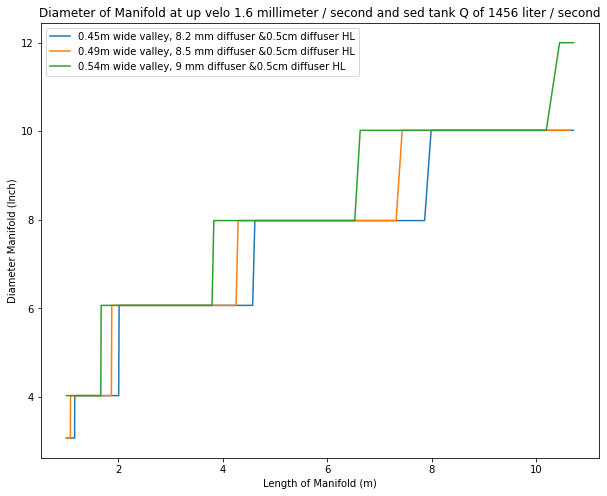

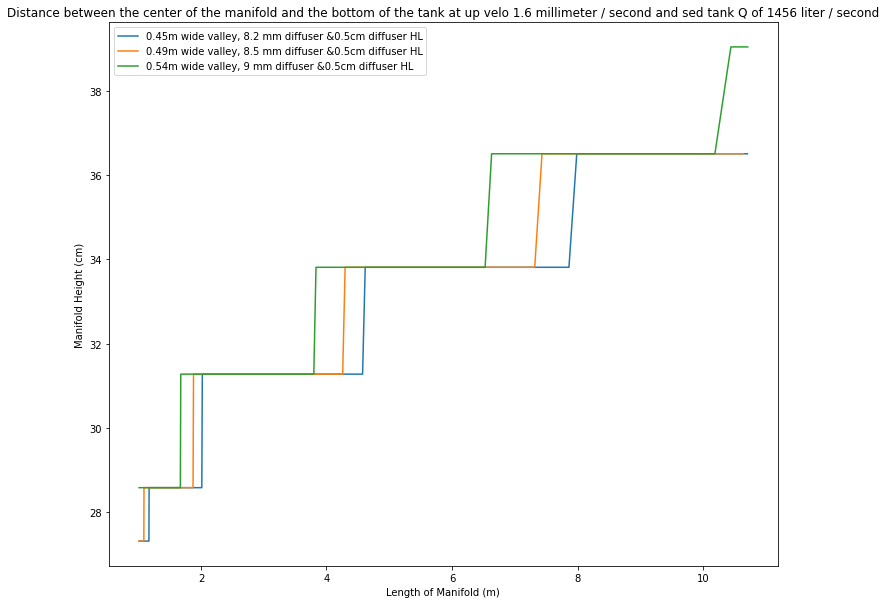

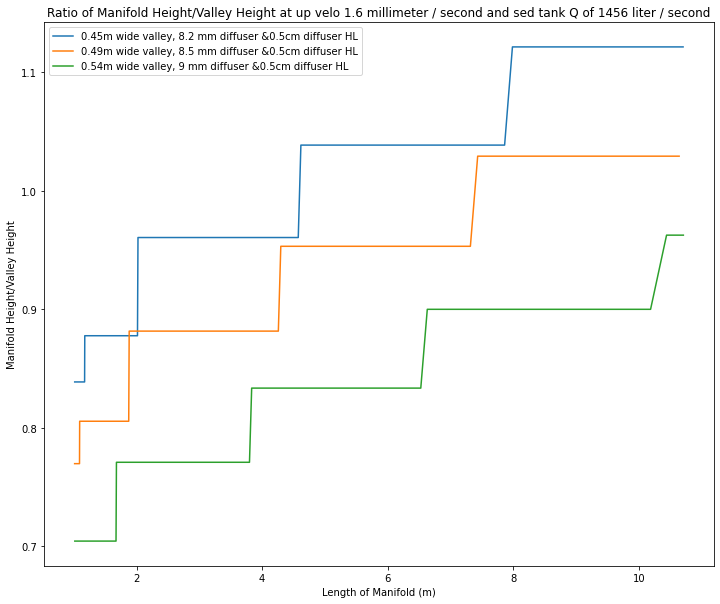

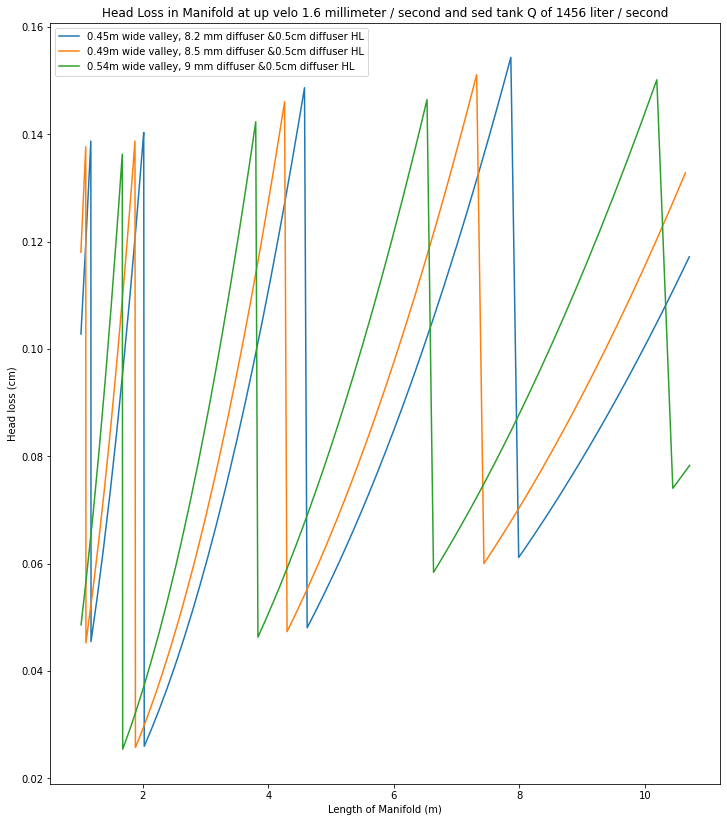

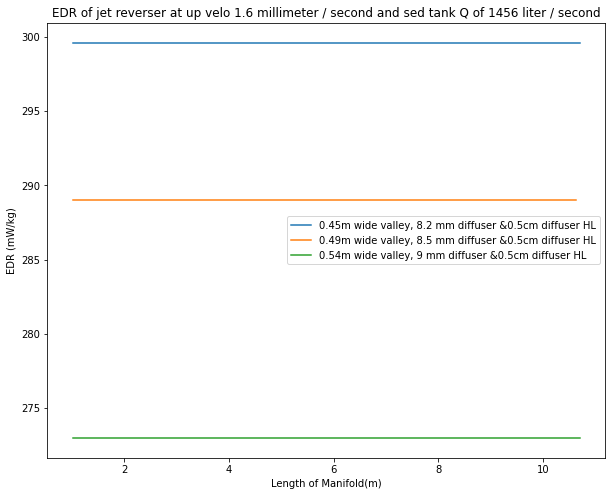

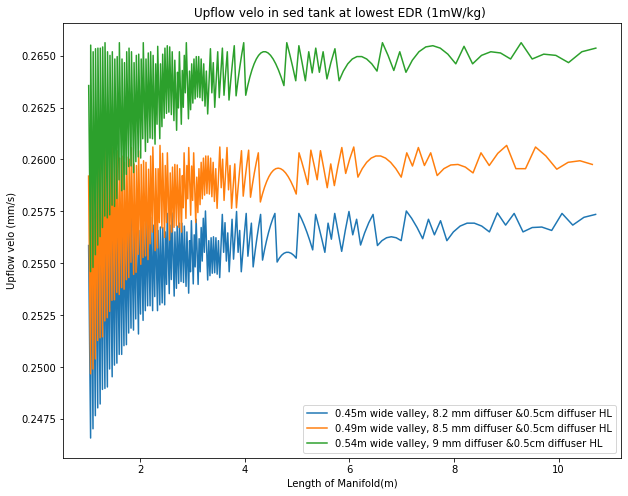

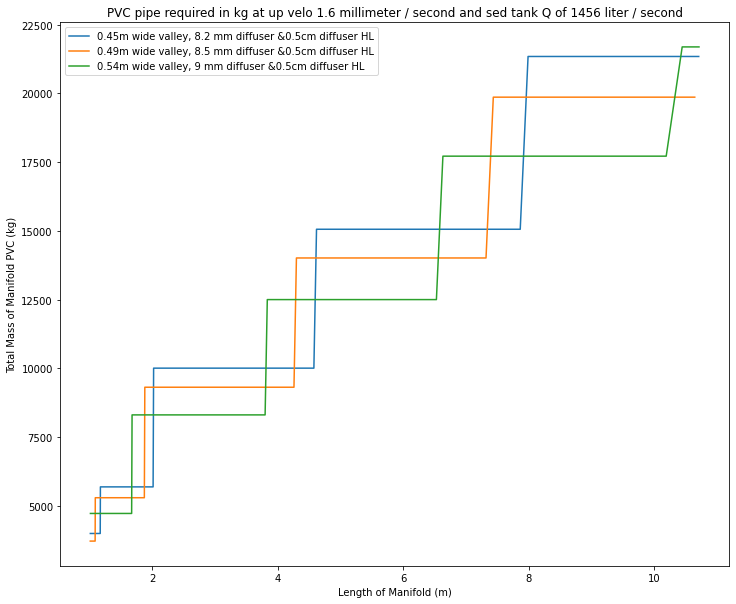

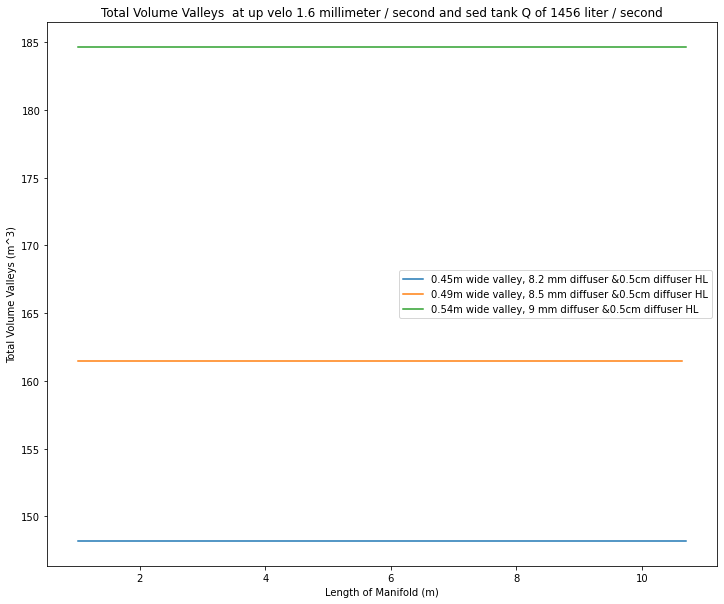

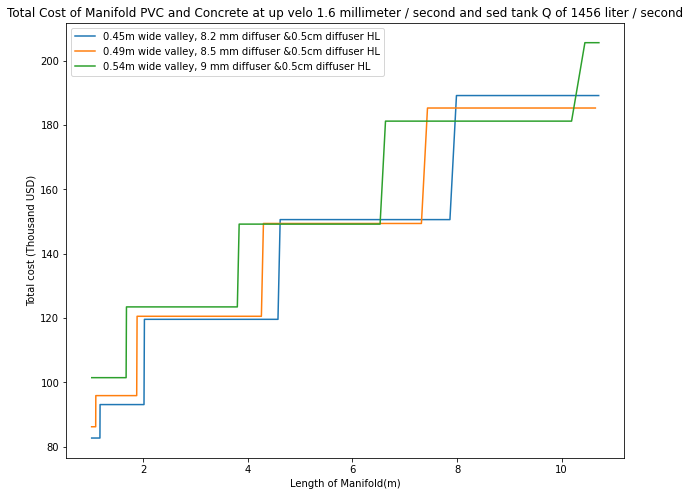

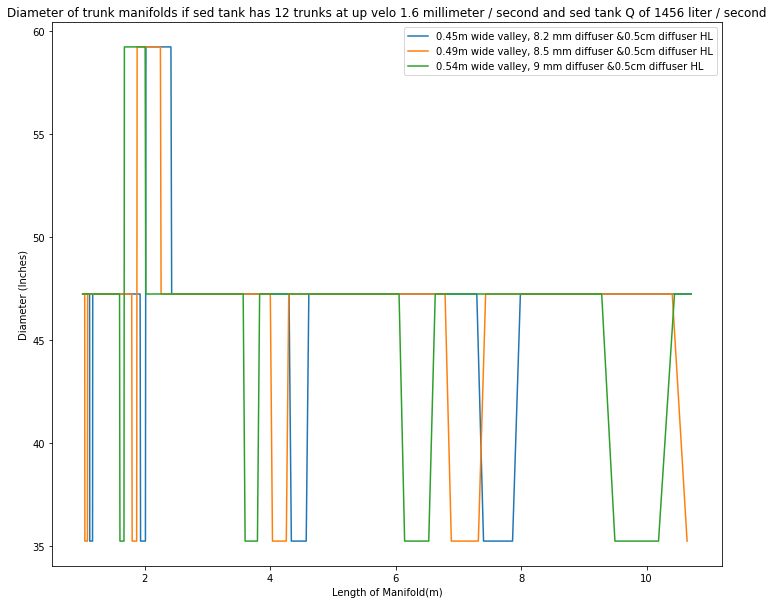

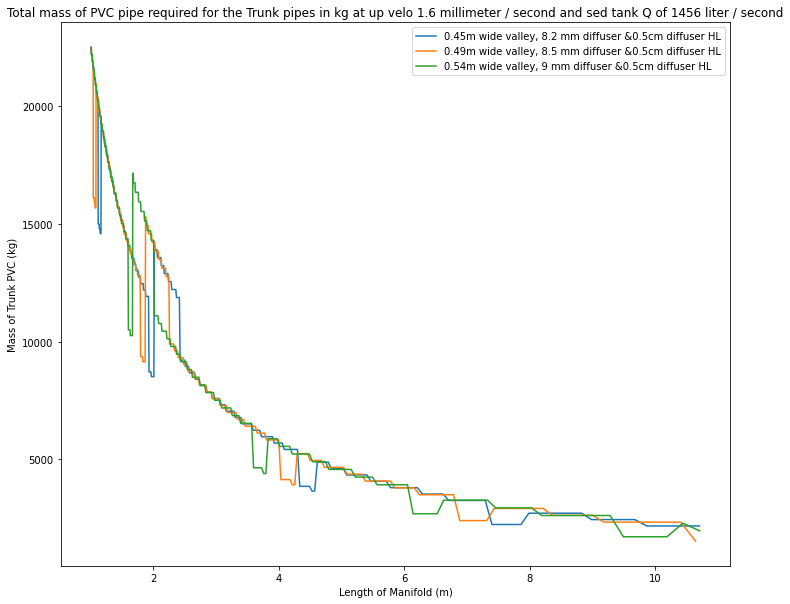

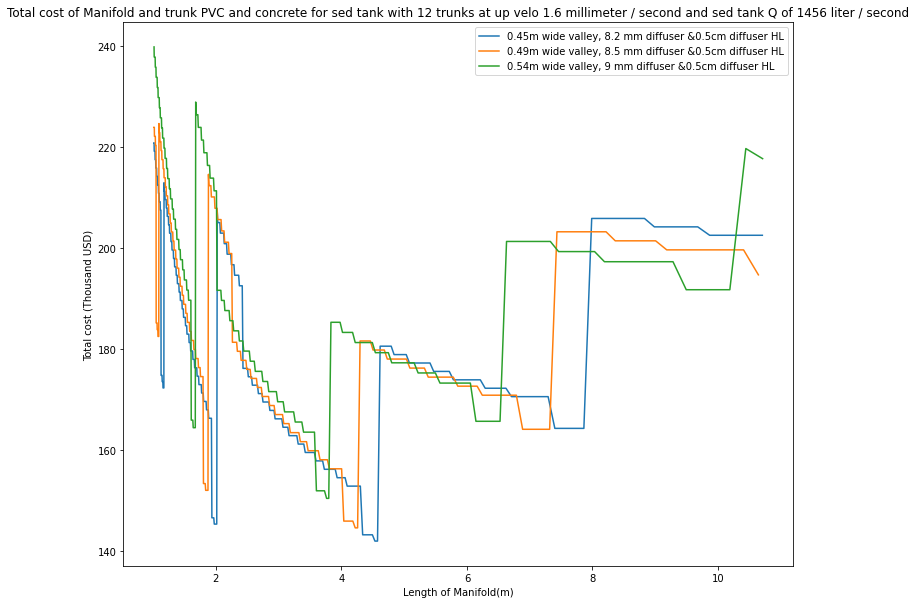

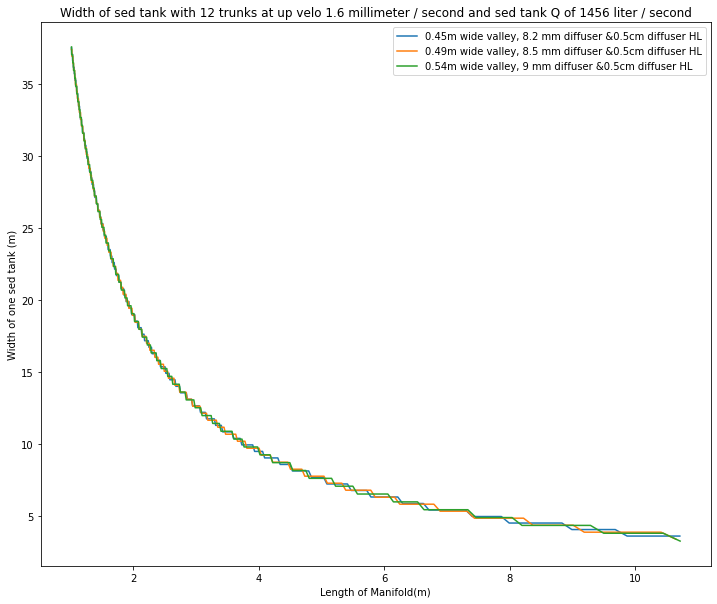

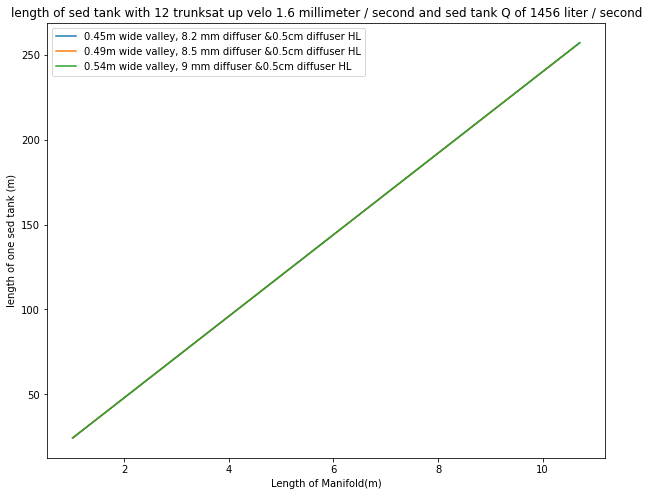

In [10]:
# code for new diffuser design WITH multiple manifolds for feeding water into valleys 
# this is on a per sed tank scale so in this case describing one out of the 16 tanks

def new_manifold_parameter_graph( V_up_FB ,Ratio_flow , HL_diffuser ,KMinor_manifold , Nu, Roughness, Q_sed , n_trunk_main):
  # This is the different diffuser sizes the code will use 
  for diam_diffuser in [8.2*u.mm , 8.5*u.mm, 9*u.mm]:

    # The following are constants needed for many of the calculations. 
    # They could have been inputs into the function but then it would be a very long list of inputs 
    pi_jet_round = 0.08 # https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#id17 
    slope_angle = 60*u.degree # angle of the bottom slopes
    density_PVC=	1.38*(u.g/u.cm**3)
    cost_concrete = 300*(u.USD/u.yard**3) # FSP Scope of work page 43 
    price_per_pound_PVC = 2.786*u.USD/u.pound # derived from Scope of work page 43
    percent_expansion = 0.6 # We can make the height of the manifold shorter by decreasing this term. This would mean that we would allow less expansion to occur before reaching half pipe
    diam_half_pipe = 3*u.inch 
    min_EDR_jet = 10*u.milliwatt/u.kg # Based on work done by Dr. Casey Garland
    max_EDR_jet = 300*u.milliwatt/u.kg # Based on work done by Dr. Casey Garland
    H_jet_min = 1*u.inch

    max_desired_width_expansion = diam_half_pipe * percent_expansion # This is in big part determined by the construction constraint
    L_spacing = (( max_desired_width_expansion/ 2) - diam_diffuser).to(u.cm) # This is the space between diffusers 
    H_jet = (10*L_spacing).to(u.cm)
    w_sed_valley = (((2*u.gravity*HL_diffuser)**(1/2) * np.pi * diam_diffuser**2) / ( 2* V_up_FB * max_desired_width_expansion)).to(u.m)
    energy_diss_rate = ((pi_jet_round * ((2*u.gravity* HL_diffuser)**(0.5))**3 ) / diam_diffuser).to(u.milliwatt/u.kg)

    # These empty lists will get populated in the following loop and will then be graphed
    # When they are inside these lists they do not have units attached so we have made sure we 
    # keep track of what the unit is before we turn it into a magnitude and add it in the list
    D =[] # in inches
    lengths=[] # in meters
    headloss=[] # in cm
    EDR = [] #in mW/kg
    manifold_sed_ratio = []
    manifold_height_to_valley_height_ratio_1 =[]
    manifold_height_1 = [] # in cm
    volume_bottom_geometry = [] # in m^3
    total_mass_PVC_manifold = [] # in kg
    mass_PVC_trunk_line_1 = [] # in kg
    cost_PVC_and_concrete = [] # in thousand USD
    total_cost_with_trunk_1 = [] # in Thousand USD
    diam_trunk_manifold = [] # in inches
    width_sed_tank = [] # In Meters
    length_sed_tank = [] # In Meters
    V_up_FB_min_1 = [] # In mm/s
    height_diffuser_1 = [] # in cm 
    height_valley_1 = [] # in cm 
    n_manifolds_per_width = []

    # The following for loop will ensure that the number of manifolds that we will loop through in the code that 
    # follows is even. Since we have to have an even number of manifolds due to the symmetry of our design
    list_n_manifolds = []
    for i in np.arange(round(85/w_sed_valley.magnitude),round(900/w_sed_valley.magnitude), round(2/w_sed_valley.magnitude)):
      if i% 2 == 0:
        list_n_manifolds.append(i)
      else:
        correction = i+1
        list_n_manifolds.append(correction)

    # filters out undesired options based on our constraints
    if H_jet > H_jet_min and energy_diss_rate <= max_EDR_jet and energy_diss_rate >= min_EDR_jet and w_sed_valley >= diam_half_pipe:   

      for n_manifolds in reversed(list_n_manifolds): 
        # I opt for looping through different number of manifolds and using that to calculate the lengths of the manifolds using the conservation of mass 
        # This allows to have the number of manifolds to later use to make cost estimates and nsures that we always deal with a whole number of manifolds. 
        length_manifold = (Q_sed / (V_up_FB * w_sed_valley *n_manifolds)).to(u.m)  
        Pi_manifold = Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow)
        manifold_ID_min = (((2 * diam_diffuser**2 * length_manifold * Pi_manifold) / ( max_desired_width_expansion ))**(0.5)).to(u.inch)
        manifold_d = sch40_pipe(manifold_ID_min) # This finds the closest available pipe of ID equal to or larger than the minimum 
        manifold_ID = (manifold_d[0]).to(u.inch)
        manifold_OD = (manifold_d[1]).to(u.inch)
        L_to_W_ratio_diffuser = 10
        height_diffuser = (L_to_W_ratio_diffuser * diam_diffuser).to(u.cm)
        manifold_height = ((5*max_desired_width_expansion) + (manifold_OD/2)).to(u.cm)
        height_valley = (np.tan(slope_angle)*((w_sed_valley - diam_half_pipe)/2)).to(u.cm)
        manifold_height_to_valley_height_ratio = (manifold_height/height_valley ).to(u.dimensionless)
        q_manifold = Q_sed / n_manifolds
        n_diffusers = ac.floor((length_manifold / max_desired_width_expansion).to(u.dimensionless)) # rounds down to nearest whole number to find number of diffusers per manifold
        hl = (ac.headloss_manifold(q_manifold ,manifold_ID,length_manifold , KMinor_manifold , Nu ,  Roughness , n_diffusers)).to(u.cm) # hl in cm

        # Cost calculations for bottom geometry and manifolds feeding diffusers 
        volume_bottom = volume_valleys(slope_angle, w_sed_valley , length_manifold , n_manifolds,diam_half_pipe)
        total_length_pipe = length_manifold * n_manifolds
        mass_PVC_manifold = (mass_pipe(density_PVC , manifold_ID, manifold_OD, total_length_pipe)).to(u.kg) 
        material_cost = ((volume_bottom*cost_concrete) + (mass_PVC_manifold *price_per_pound_PVC)).to(u.kiloUSD)

        # Calculations for the trunk lines feeding the secondary manifolds
        n_manifolds_per_width_tank = round(n_manifolds / (2 * n_trunk_main))
        width_sed_active = (w_sed_valley * n_manifolds_per_width_tank).to(u.meter)
        L_sed_tank = (2*length_manifold* n_trunk_main).to(u.meter)
        diam_trunk_line_min = ((n_manifolds_per_width_tank * manifold_ID**2 * Pi_manifold )**0.5).to(u.inch)
        trunk_line_info = sch40_pipe(diam_trunk_line_min)  # This finds the closest available pipe of ID equal to or larger than the minimum 
        trunk_line_ID = (trunk_line_info[0]).to(u.inch) 
        trunk_line_OD = (trunk_line_info[1]).to(u.inch)
        total_length_trunk = width_sed_active * n_trunk_main
        mass_PVC_trunk_line = (mass_pipe(density_PVC , trunk_line_ID, trunk_line_OD, total_length_trunk )).to(u.kg) 

        # sum of the mass of PVC in the manifold and the trunk manifold 
        mass_PVC_manifold_and_trunk = mass_PVC_manifold + mass_PVC_trunk_line 
        total_cost_with_trunk = ((volume_bottom*cost_concrete) + (mass_PVC_manifold_and_trunk *price_per_pound_PVC)).to(u.kiloUSD)


        # We also want to know at what upflow velocity the EDR for the jets goes below 1mW/kg 
        velo_diffuser_min = (((min_EDR_jet * diam_diffuser) / pi_jet_round)**(1/3)).to(u.mm/u.s)
        q_segment_min = velo_diffuser_min * ac.area_circle(diam_diffuser) * n_diffusers
        V_up_FB_min = (q_segment_min / (length_manifold * w_sed_valley)).to(u.mm/u.s)

        # We want to know how far away the manifold is from the valley wall if it is at a height where it can come into 
        # contant with the walls of the valley. If it is taller than the valleys then we measure the ratio of the manifold diameter to width of valley  
        if manifold_height < height_valley:
          width_available_at_manifold_height = (2*(manifold_height/np.tan(slope_angle))) + diam_half_pipe
          manifold_to_wall_ratio = (manifold_OD / width_available_at_manifold_height).to(u.dimensionless)
        else:
          manifold_to_wall_ratio = (manifold_OD /w_sed_valley).to(u.dimensionless)

        # If the manifolds take up more space than the max_manifold_to_wall ratio specified then the 
        # the code will stop graphing those options.  
        max_manifold_to_wall_ratio = 0.65 # this is a measure of how much area the manifold takes up in the sed tank
        if manifold_to_wall_ratio < max_manifold_to_wall_ratio:
          lengths.append(length_manifold.magnitude) # (in meters)
          D.append(manifold_ID.magnitude) # (in inches)
          manifold_sed_ratio.append(manifold_to_wall_ratio)
          manifold_height_to_valley_height_ratio_1.append(manifold_height_to_valley_height_ratio)
          manifold_height_1.append(manifold_height.magnitude) # in cm
          headloss.append(hl.magnitude) # in cm
          EDR.append(energy_diss_rate.magnitude)
          total_mass_PVC_manifold.append(mass_PVC_manifold.magnitude)
          volume_bottom_geometry.append(volume_bottom.to(u.m**3).magnitude)
          cost_PVC_and_concrete.append(material_cost.magnitude)
          diam_trunk_manifold.append(trunk_line_ID.magnitude) # in inches
          total_cost_with_trunk_1.append(total_cost_with_trunk.magnitude) #  in thousand USD
          width_sed_tank.append(width_sed_active.magnitude) # in meter 
          length_sed_tank.append(L_sed_tank.magnitude) # in meter 
          V_up_FB_min_1.append(V_up_FB_min.magnitude) # in mm/s
          height_diffuser_1.append(height_diffuser.magnitude) # in cm 
          height_valley_1.append(height_valley.magnitude) # in cm
          n_manifolds_per_width.append(n_manifolds_per_width_tank)
          mass_PVC_trunk_line_1.append(mass_PVC_trunk_line.magnitude)
        else:
          manifold_sed_ratio.append(None)
          cost_PVC_and_concrete.append(None)
          lengths.append(None) 
          D.append(None) 
          manifold_height_to_valley_height_ratio_1.append(None)
          manifold_height_1.append(None) 
          headloss.append(None) 
          EDR.append(None)
          total_mass_PVC_manifold.append(None)
          volume_bottom_geometry.append(None)
          total_cost_with_trunk_1.append(None)
          diam_trunk_manifold.append(None)
          width_sed_tank.append(None) 
          length_sed_tank.append(None) 
          V_up_FB_min_1.append(None)
          height_diffuser_1.append(None) # in cm 
          height_valley_1.append(None) # in cm
          n_manifolds_per_width.append(None)
          mass_PVC_trunk_line_1.append(None)

    # We want to print out the design options with lowest price which correspond with the low points on the total cost graph
    min_cost = min(x for x in total_cost_with_trunk_1 if x is not None) # Finds lowest price in the list of prices 
    index_min_cost = total_cost_with_trunk_1.index(min_cost) # The index for that price is stored and can also be used in other lists to find the corresponding values at that price
    print ('lowest price option for diffuser diameter of '+ str(diam_diffuser)+ ' diffuser head loss '+str(HL_diffuser)+ ' and '+str(n_trunks_main)+' trunks')
    print('The diameter of the diffusers is '+str(diam_diffuser)+' ,spacing between diffusers is '+str(L_spacing)+' and the height of  diffuser is '+str(height_diffuser_1[index_min_cost]*u.cm))
    print('The manifolds have an ID of '+str(D[index_min_cost]*u.inch)+' and length of '+str(lengths[index_min_cost]*u.m))
    print ('The height of the jet is '+str(H_jet)+' and the height of the manifold is '+str(manifold_height_1[index_min_cost]*u.cm))
    print('The height of the triangular peak is '+str(height_valley_1[index_min_cost]*u.cm) +' the peak to peak width is '+str(w_sed_valley)+' and the number of valleys is '+str(n_manifolds_per_width[index_min_cost]))
    print('The Trunk manifold has an inner diameter of ',(diam_trunk_manifold[index_min_cost]*u.inch))
    print('The width of the tank is ' +str(width_sed_tank[index_min_cost]*u.m)+' and the length is '+str(length_sed_tank[index_min_cost]*u.m))
    print ('The total cost of materials is ', min_cost*u.kiloUSD)

    # sometimes the lowest price is not the optimal , so lets look at the second lowest price
    min_cost_2 = min(x for x in total_cost_with_trunk_1 if x is not None and x != min_cost \
                     and diam_trunk_manifold[total_cost_with_trunk_1.index(x)] == diam_trunk_manifold[index_min_cost]\
                     and (lengths[total_cost_with_trunk_1.index(x)] >= lengths[index_min_cost]*1.1 or lengths[total_cost_with_trunk_1.index(x)] <= lengths[index_min_cost]*0.9))
    index_min_cost_2 = total_cost_with_trunk_1.index(min_cost_2)
    print ('Second lowest price option ' + str(diam_diffuser)+ ' diffuser head loss '+str(HL_diffuser)+ ' and '+str(n_trunks_main)+' trunks')
    print('The diameter of the diffusers is '+str(diam_diffuser)+' ,spacing between diffusers is '+str(L_spacing)+' and the height of  diffuser is '+str(height_diffuser_1[index_min_cost_2]*u.cm))
    print('The manifolds have an ID of '+str(D[index_min_cost_2]*u.inch)+' and length of '+str(lengths[index_min_cost_2]*u.m))
    print ('The height of the jet is '+str(H_jet)+' and the height of the manifold is '+str(manifold_height_1[index_min_cost_2]*u.cm))
    print('The height of the triangular peak is '+str(height_valley_1[index_min_cost_2]*u.cm) +' and the peak to peak width is '+str(w_sed_valley) +' and the number of valleys is '+str(n_manifolds_per_width[index_min_cost_2]))
    print('The Trunk manifold has an inner diameter of ',diam_trunk_manifold[index_min_cost_2]*u.inch)
    print('The width of the tank is ' +str(width_sed_tank[index_min_cost_2]*u.m)+' and the length is '+str(length_sed_tank[index_min_cost_2]*u.m))
    print ('The total cost of materials is ', min_cost_2*u.kiloUSD)
    
    # We dont want to label the options that result in heights smaller than 1 inch or have EDR too high or too low 
    if H_jet > H_jet_min and energy_diss_rate <= 300*u.milliwatt/u.kg and energy_diss_rate >= 1*u.milliwatt/u.kg and w_sed_valley >= diam_half_pipe:
      string = str(round(w_sed_valley.magnitude , 2))+'m wide valley, '+str(round(diam_diffuser.magnitude, 2))+' mm diffuser &' +str(HL_diffuser.magnitude)+'cm diffuser HL'
    else:
      string='' 
    title_2 = 'at up velo '+str(V_up_FB.to(u.mm/u.s)) +' and sed tank Q of '+str(Q_sed.to(u.l/u.s))
    plt.figure(1,[10,8])  
    plt.plot(lengths,D,label=string)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('Diameter Manifold (Inch)')
    plt.title('Diameter of Manifold ' +title_2)
    plt.legend()
      
    #plt.figure(2,[12,10])
    #plt.plot(lengths,manifold_sed_ratio,label=string)
    #plt.xlabel('Length of Manifold (m)')
    #plt.ylabel('Ratio of Manifold Diameter/Sed Width')
    #plt.title('Ratio Manifold Diameter / Sed Width ')
    #plt.legend()

    plt.figure(3,[12,10])
    plt.plot(lengths,manifold_height_1,label=string)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('Manifold Height (cm)')
    plt.title('Distance between the center of the manifold and the bottom of the tank '+ title_2)
    plt.legend()

    plt.figure(4,[12,10])
    plt.plot(lengths,manifold_height_to_valley_height_ratio_1,label=string)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('Manifold Height/Valley Height')
    plt.title('Ratio of Manifold Height/Valley Height '+ title_2)
    plt.legend()

    plt.figure(5,[12,14])
    plt.plot(lengths,headloss,label=string,)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('Head loss (cm)')
    plt.title('Head Loss in Manifold '+title_2)
    plt.legend()

    plt.figure(6,[10,8])
    plt.plot(lengths,EDR,label=string,)
    plt.xlabel('Length of Manifold(m)')
    plt.ylabel('EDR (mW/kg)')
    plt.title('EDR of jet reverser '+title_2)
    plt.legend()

    plt.figure(7,[10,8])
    plt.plot(lengths,V_up_FB_min_1,label=string,)
    plt.xlabel('Length of Manifold(m)')
    plt.ylabel('Upflow velo (mm/s)')
    plt.title('Upflow velo in sed tank at lowest EDR (1mW/kg) ')
    plt.legend()

    plt.figure(8,[12,10])
    plt.plot(lengths,total_mass_PVC_manifold,label=string,)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('Total Mass of Manifold PVC (kg)')
    plt.title('PVC pipe required in kg '+ title_2)
    plt.legend()

    plt.figure(9,[12,10])
    plt.plot(lengths,volume_bottom_geometry,label=string,)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('Total Volume Valleys (m^3)')
    plt.title('Total Volume Valleys  '+title_2)
    plt.legend()

    plt.figure(10,[10,8])
    plt.plot(lengths,cost_PVC_and_concrete,label=string,)
    plt.xlabel('Length of Manifold(m)')
    plt.ylabel('Total cost (Thousand USD)')
    plt.title('Total Cost of Manifold PVC and Concrete '+ title_2)
    plt.legend()

    plt.figure(11,[12,10])
    plt.plot(lengths,diam_trunk_manifold,label=string)
    plt.xlabel('Length of Manifold(m)')
    plt.ylabel('Diameter (Inches)')
    plt.title('Diameter of trunk manifolds if sed tank has '+str(n_trunks_main)+' trunks '+ title_2)
    plt.legend()

    plt.figure(12,[12,10])
    plt.plot(lengths,mass_PVC_trunk_line_1,label=string,)
    plt.xlabel('Length of Manifold (m)')
    plt.ylabel('Mass of Trunk PVC (kg)')
    plt.title('Total mass of PVC pipe required for the Trunk pipes in kg '+title_2)
    plt.legend() 

    plt.figure(13,[12,10])
    plt.plot(lengths,total_cost_with_trunk_1,label=string,)
    plt.xlabel('Length of Manifold(m)')
    plt.ylabel('Total cost (Thousand USD)')
    plt.title('Total cost of Manifold and trunk PVC and concrete for sed tank with '+str(n_trunks_main)+' trunks ' +title_2)
    plt.legend()

    plt.figure(14,[12,10])
    plt.plot(lengths,width_sed_tank,label=string,)
    plt.xlabel('Length of Manifold(m)')
    plt.ylabel('Width of one sed tank (m)')
    plt.title('Width of sed tank with '+str(n_trunks_main)+' trunks '+title_2)
    plt.legend()

    plt.figure(15,[10,8])
    plt.plot(lengths,length_sed_tank,label=string,)
    plt.xlabel('Length of Manifold(m)')
    plt.ylabel('length of one sed tank (m)')
    plt.title('length of sed tank with '+str(n_trunks_main)+' trunks' + title_2)
    plt.legend()


n_tanks= 16
redundant_tanks = 2
q_tank = (fmt.q_max / (n_tanks - redundant_tanks)).to(u.feet**3/u.s) 
n_trunks_main = 12
# Running the function for various head loss values. The values can be changed 
for i in [0.5*u.cm]:
  #np.linspace(0.2 ,0.75,3)*u.cm
  new_manifold_parameter_graph( max_V ,Ratio_flow , i, KMinor_manifold , Nu, Roughness , q_tank ,n_trunks_main)

### Interpretation of graphs

The first set of graphs that we produced were the ones that showed the diameters of the manifolds.








<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/AC_vs_alternative_manifold_diameters_1.JPG" height=550>
</p>
<p align="center">






**Figure 7** Side by side comparison between the two diffuser designs. Traditional AguaClara diffuser on the left and a new alternative on the right. 







When we compare the two diffuser designs side by side we can see some important differences. First, The diffuser width shown on the AguaClara design on the left of 3.17 mm is the smallest diffuser width possible with this design. This is based mostly on our desire to ensure that the diffusers don't clog. The alternative design however has a minimum diffuser diameter of 8.2mm and this is due to a constraint on the maximum energy dissipation rate. In both designs, smaller diffusers transalte to smaller diameter manifolds. We can see that large diffusers causes the manifold diameters to jump up at shorter manifold lengths. However, the new diffuser design with holes instead of the rectangular diffusers can have longer manifolds before having to increases the manifold diameter. 



This alone would leads us to think that the alternative diffuser design is more efficient. To definitively determine this we also carried out a cost comparison of the two designs. 









<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/AC_vs_alternative_total_cost.JPG" height=500>
</p>
<p align="center">









**Figure 8** Cost comparison between traditional AguaClara diffuser design (left) and new proposed diffuser and manifold design (right).




If now we consider cost, the difference between the two different designs becomes clear. The alternative diffuser design allows us to use smaller diameter pipe AND we can use narrower valleys. The combination of those two factors allows us to use less concrete and less PVC piping. This change in design has led for a decrease in the total price of PVC and concrete by nearly $40,000 dollars per tank which on a plant scale is \$ 640,000 USD. 

This has validated our assumption about the alternative diffuser design and moving forwards will be the design of choice for the Fairmont Sedimentation plant.














# Selecting Number of Trunk Lines
Now that we determined which manifold design we were using we had to decide how many trunk lines we wanted in each tank. We know from the following expression that as the number of trunks, $n_{Trunks}$, increases the smaller the diameter pipe that is needed. 
$$D_{Trunk} = \sqrt{  D_{Manifold}^2 \frac{Q_{Tank}}{ 2n_{Trunks} v_{FB} W_{Valley} L_{Manifold}} \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}  }$$

We played around a bit with the code above and determined that 12 trunk lines resulted in a trunk diameter of 36 Inches and showed a reasonable cost. 

The final design criteria that remained was the lengths of the manifolds. We used our cost analysis as one of the principle tools for helping us make that decision. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/final_cost_graph_.JPG" height=500>
</p>
<p align="center">







From the figure above we can see that there are two different lengths for a design with diffuser diam of 8.2mm that give similar low cost. The 4.5m long manifold design however results in a layout where each tank is 8.1 m wide and 110 m long, whereas a 2m long manifold results in a 19m wide by 47m long tank. This is a dimension that we can more easily deal with therefore is the manifold length that will be used in our design moving forward.

# Explanation of Trend

Besides arriving to an good design this analysis has also helped us understand major trends. From the previous price curve we can see that at short manifold lengths there is a very high price. However, as you increase the length of manifolds the price curve comes down but then begins to rise again giving us a range of lengths in which the price is at an optimum. To get a better sense of why this is we should look at the bulk volume of the materials that are factored into this cost curve. The first is concrete and that actually does not vary with the length of the manifolds. The second is the mass of PVC used for the manifolds. The relationship between mass of PVC in the manifolds and length is described as follows:
$$\rlap{-}V_{PVC \space Manifold} = \frac{\pi }{4} (D_{outer}^2 - D_{Inner}^2) L_{Manifold} n_{Manifolds}$$
Where the diameter of the manifold is:
$$D_{Manifold} = \sqrt{ \frac{2D_{Diffuser}^2 L_{Manifold} \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 -\Pi_{Q}^2)}}} {D_{Half\space Pipe} \Pi_{Expansion \space Jet}} }$$

From this it is clear that total volume of PVC in manifold increases as length of manifold increases. 

For the trunk lines the mass of PVC is found the following way:
$$\rlap{-}V_{PVC \space Trunk} = \frac{\pi }{4} (D_{outer}^2 - D_{Inner}^2) L_{Trunk} n_{Trunks}$$

Where the diameter of the trunk is: 
$$D_{Trunk} = \sqrt{  D_{Manifold}^2 \frac{Q_{Tank}}{ 2n_{Trunks} v_{FB} W_{Valley} L_{Manifold}} \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}  }$$

and $L_{Trunk}$ is the width of the tank: 

$$W_{Tank} = \frac{Q_{Tank}}{2\space n_{Trunks}v_{FB} L_{Manifold}}$$ 

Therefore the total mass of PVC in the trunk lines decreases as the length of the manifold increases. The following figure shows those two relationships


<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/PVC_mass_graphs_manifold_and_trunk.JPG" height=500>
</p>
<p align="center">



### Observations on the diameters of trunk line when changing the following variables

**Changing Length** 
- As length of manifold increases the minimum diameter of the trunk line decreases. This is because the longer the branching manifolds are, the higher the flow rate in each branch which allows for a faster velocity in the trunk line. However, as the manifold length increases, the diameter of that branch also increases. Since this is occuring in a step wise fashion, due to us selecting the diameters based on the diameters of standard schedule 40 PVC pipes, when the increase occurs the diameter of the trunk line also increases in order to maintain the velocity in the branches and in the main trunk line at the desired ratio to ensure uniform flow. As the length of the manifold continues to increase the diameter of the trunk line starts to decreases again since the velocity of the ports increases. This pattern where trunk diameter decreases then increases then decreases occurs repeatedly as the length of manifold increases. 

**Changing Number of Trunk Lines**
- The more trunk lines, the smaller the diameter of each trunk line. The more trunk lines the more length of that trunk line we need. 

**Changing head loss at the diffuser** 
- The higher the desired head loss at the diffuser the smaller the trunk manifold can get. This is because higher head losses require greater velocities leaving the diffusers and so each manifold feeding off the trunk will have a higher velocity. 




## Layout of Sedimentation Tank Area
**Initial Design**

Our layout must allow for certain units to be turned off in times of low flow or if repairs are necessary. Additionally, the water should not be completely covered so that maintenance can occur in sections if something is to go wrong. An open-top system allows for easier diagnosis of issues and repair. 

Based on the above criteria, we proposed the layout shown in the figure below. Influent water arrives in a main channel and is then distributed into eight smaller channels that bisect each sedimentation unit. In our design there are 8 sedimentation units and each unit is comprised of two tanks. This layout allows for tanks to share effluent channels, thereby decreasing the required planview area. 


<p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/Sed_Hyd_Layout.png?raw=1" height=300>
</p>
<p align="center">


In [11]:
#we use a tentative depth that will roughly equal the sedimentation depth and adjust later
depth_sed = 3 * u.m

#using the maximum flow,we determine minumum area
width_min = fmt.q_max/(fmt.velo_flocculated_max*depth_sed)
print('The minumum width of the influent channel is', width_min.to(u.m))

#we use this width to see how low of a flow rate ca be used to still meet the minimum velocity
#If these dimensions of the tank cover a wide range of flow rates, it will work
#we can also turn off sed tank units to adjust flow
v_min = 0.15 * u.m/u.s
flow_min = v_min*depth_sed*width_min
print('The minimum flow rate that this size influent channel can handle without turning off a sedimentation tank is', flow_min.to(u.ft**3/u.s))

#size of smalled channels leading to sed tanks
width_small = width_min/8
print('The smaller channels will have a width of', width_small.to(u.m))


The minumum width of the influent channel is 14.86 meter
The minimum flow rate that this size influent channel can handle without turning off a sedimentation tank is 236.2 foot ** 3 / second
The smaller channels will have a width of 1.858 meter


Although this design is efficient in saving planview area and allowing for flexible operation, it fails to address one key aspect. According to the Ten States Standard, flocculated water must travel through channels at a minimum velocity of 0.15 m/s and maximum of 0.45 m/s. After calculating the dimensions for this design, we saw that at minimum flow in the plant the minimum velocity requirement was broken. In fact, given this configuration of sed tanks, it is impossible for the channels to accomodate both maximum and minimum flow while adhering to the Ten States Standard velocities requirements.

#**Final Design**
<p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/sed_tank_layout_new.PNG?raw=1" height=300>
</p>
<p align="center">

This design allows for flexibility in turning off units while also accomodating a wide range of flow within the Ten State Standards. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/Final_plant_layout_big_scale.JPG" height=500>
</p>
<p align="center">

**Figure** Overall layout of our sedimentation basins. There are three main scales outlined. Each treatment train has two sedimentation units that can be shut off and on and each unit has two tanks that draw water from one influent channel, shown in yellow

The final layout for the plant will have to have channels running to the right at the bottom because in the proposed site for the plant the rapid mix and flocculators were going to be in that area. However, that can be adjusted if it is determined that those components can go somewhere below the current layout. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/Tank_layout_final.JPG" height=500>
</p>
<p align="center">

**Figure** This what each sedimentation tank looks like from above. The effluent launders are not shown here. Flocculated water enters from the inlet channel and goes through one of the 12 main trunk lines. Then water flows into individual manifolds and then through the jet reversers. 

The final layout for each tank includes the inlet structures and the floc hoppers in the figure above. The figure below helps the reader visualize the inlet structure better. Each trunk line will have 42 tee connections to manifolds below. Those manifolds will extend nearly 2 meters on both sides of the trunk line as shown in the figure below (bottom most diagram). 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/sketch_of_trunk_and_manifolds.JPG" height=500>
</p>
<p align="center">

**Figure** Top sketch shows the trunk lines and the branching manifolds from a birds-eye-view. Bottom sketch shows the trunks and manifolds as they would look from inside the tanks. The valleys, half pipes, and floc hoppers are not shown in this schematic.


<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/trunk_manifold_and_valleys.JPG" height=500>
</p>
<p align="center">

**Figure** Trunk line feeds the manifolds which run into and out of the page from this perspective. The manifolds then deliver water into the tank via the diffusers. As water leaves diffusers it expands until it reaches the half pipe below and then gets redirected in the upward direction. Diffusers are offset to one side to ensure proper resuspension of flocs. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/final_dimensions_diffusers.JPG" height=500>
</p>
<p align="center">

**Figure** The final dimensions for the diffusers and its various components

Next we want to design the inlet channels for each train and each sed unit. 


In [12]:
## Design with two independent treatment trains
#Each train has two rows of 2 tanks
#At max flow, each unit needs to accomodate 720/(n-1) cfs

n_tanks= 8
redundant_tanks = 1
q_tank = (fmt.q_max / (n_tanks - redundant_tanks)).to(u.feet**3/u.s)


#Test to make sure this is within upflow velocity range
#Tentative sed tank dimensions
length=18.99*u.m # based on diffuser and manifold design 
V_up_max = 1.6*u.mm/u.s
width= 48.31*u.m
area_per_tank =length*width
print('The design flow per unit is ', q_tank.to(u.feet**3/u.s),'or',q_tank.to(u.L/u.s))


tanks_per_train = 2
n_treatment_trains = 4 
q_channel_max= (q_tank *n_tanks) / n_treatment_trains
depth=3*u.m

#Calculate the minimum width that can accomodate 206 cfs (2 units) without exceeding the 0.45 m/s limit
width_min=q_channel_max/fmt.velo_flocculated_max/depth
print('The minimum width of the channel is '+str(width_min.to(u.m))+' if its depth is '+str(depth))
#Check that at minimum flow the velocity in the channel is above 0.15 m/s
v_min_channel= fmt.q_min/(width_min*depth)
print('At minimum flow the velocity in the main channel is',v_min_channel.to(u.m/u.s))  
vup_1_tank= fmt.q_min/(area_per_tank )
vup_2_tank = fmt.q_min/(area_per_tank *2)
vup_3_tank = fmt.q_min/(area_per_tank *3)
print('The upflow velocity at minimum flow if 1 tank is on in a train is ',vup_1_tank.to(u.mm/u.s))
print('The upflow velocity at minimum flow if 2 tanks are on in a train is ',vup_2_tank.to(u.mm/u.s))
print('The upflow velocity at minimum flow if 2 tanks are on in a train is ',vup_3_tank.to(u.mm/u.s))

#Calculate the dimensions of the side channels
#each side channel will handle maximum 206/2 cfs
width_sidechannel=(q_tank)/fmt.velo_flocculated_max/depth
print('The minimum size of the side channel is',width_sidechannel.to(u.m))
#Check that at minimum flow the velocity in the channel is above 0.15 m/s
v_min_channel= fmt.q_min/(width_sidechannel*depth)
print('At minimum flow the velocity in the side channel is',v_min_channel.to(u.m/u.s))  

##Calculate the total plan view area
#For now assume effluent channels are same size as influent channels

a_tank=area_per_tank * n_tanks
a_influent_mainchannel=4*(width_min*3*(length+width_sidechannel))
a_sidechannel=8*(width_sidechannel*width)
a_effluent=4*width_min*(4*(length+width_sidechannel))
a_total=a_tank+a_influent_mainchannel+a_sidechannel+a_effluent
print('The total planview area is',a_total.to(u.m**2))

The design flow per unit is  102.9 foot ** 3 / second or 2913 liter / second
The minimum width of the channel is 4.247 meter if its depth is 3 meter
At minimum flow the velocity in the main channel is 0.2063 meter / second
The upflow velocity at minimum flow if 1 tank is on in a train is  2.865 millimeter / second
The upflow velocity at minimum flow if 2 tanks are on in a train is  1.433 millimeter / second
The upflow velocity at minimum flow if 2 tanks are on in a train is  0.9551 millimeter / second
The minimum size of the side channel is 2.123 meter
At minimum flow the velocity in the side channel is 0.4126 meter / second
The total planview area is 1.067e+04 meter ** 2


Lastly we needed to ensure that the velocity at the end of the side channel after flow had been diverted into the tanks remained above 0.15 m/s. This is achieved by raising the floor at the end of the channel.

In [13]:
##Find minimum velocity at the end of the side channel (velocity at minimum flow)
#minimum flow through a unit is plant min flow
n_trunks=12


q_end=fmt.q_min/n_trunks
floor_height=depth-(q_end/fmt.velo_flocculated_min)/width_sidechannel
print('The floor at the end of the side channel needs to be raised',floor_height.to(u.m))
floor_raise=floor_height/(n_trunks-1)
print('After every trunk the floor should raise by',floor_raise.to(u.cm))

#check that at max flow with all tanks on the velocity is within the range
n_tanks=7 #redundancy of 1
q_end=fmt.q_max/(n_tanks*n_trunks)
v_end=q_end/(width_sidechannel*(depth-floor_height))
print('The velocity at the end is',v_end.to(u.m/u.s))


The floor at the end of the side channel needs to be raised 2.323 meter
After every trunk the floor should raise by 21.12 centimeter
The velocity at the end is 0.1689 meter / second


Side view of side channel with raised floor. 

<p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/channel_floor.PNG?raw=1" height=300>
</p>
<p align="center">

## Plate Settlers

The design of the plate settlers must optimize their length. If they are too short, smaller flocs will not have the time needed to settle out and will make it into the effluent water. Longer plates will take up more space than necessary, making the overall design less cost-efficient. As shown in the **Physics** section above, the equation to determine the ideal length of the plate settlers is$$L = \frac{S\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}-1\right) + T\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}\right)}{sin\alpha cos\alpha}$$ 

A surface loading rate for plate settlers of 0.5 gpm/ft^2, or o.339 mm/s is given from the [Fairmont Sedimentation Plant Scope of Work](file:///C:/Users/Claudia/Downloads/Fairmont%20Sedimentation%20Plant%20Scope%20of%20Work%20_FINAL%2006-01-17.pdf). This will be interpreted as the capture velocity for the plate settlers. ${\alpha}$ will be the AguaClara standard of 60 degrees. 

  Initially, the value of $v_{z_{Plate}}$ is set to the maximum upflow velocity of 1.6 mm/s in order to get an estimate of what the length will need to be. This length is then adjusted so the total number of plate settlers needed is an integer. The active length of the sedimentation area is then calculated to measure the actual maximum upflow velocity through the plates.  A length of to $L{cos\alpha}$ is removed from the sedimentation tank length to account for the "lost triangle", or the section of tank that cannot be used for plate sedimentation because of the angle of the plate settlers. The area taken up by the plates is also removed by multiplying the number of plates by their thickness and subtracting this value from the active length. The equation
   $$Q_{Sed} = W_{Sed} L_{SedActive} \bar v_{z_{Active}}$$  is used to calculate the real $v_{z_{Plate}}$. This value is then plugged back in to the original length equation, and if the minimum length is less than the length used, the design holds. 

  The variable $S$ can be solved for using the equation $$S_{min} \approx \frac{3 D_0}{sin^2\alpha} \frac{\bar v_{z_{Plate}}}{v_c}  \left( \frac{18 v_c \Phi \nu }{D_0^2g} \frac{ \rho_{H_2O}}{ \rho_{floc_0} - \rho_{H_2O}} \right) ^{\frac{1}{ D_{fractal} - 1}}$$
However, the characteristics of the ferric chloride flocs are unknown, so it will be difficult to determine a reliable value from this equation. When determining $S$, we need to ensure that floc rollup will not occur and prevent flocs from settling out of the water. Having a smaller $S$ allows for more plates to be put into a smaller area. This means the plates do not have to be as long and take up as much depth, which could reduce the overall costs. However, the design for the influent and effluent channels being used relies on the fact that they are 3 meters deep in order for all of the velocity requirements to be met. This means that there is a lot of room for plate settlers to take without necessarily increasing the overall costs. This means that a more conservative approach can be taken towards spacing. The Ten State Standards recommend a spacing of at least 2 inches, so this value will be used.

While our original design had the plate settlers going vertically, we changed it so the plate settlers will go horizontally in the sedimentation tank as shown below. This is because if they went vertically, there would be a lost triangle around every floc hopper, making the overall area that water can flow through the plate settlers smaller. This would make the design less efficient overall.
 <p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/Plate_Set_Layout.png?raw=1" height=300>
</p>
<p align="center">

In [14]:
#Minimum spacing between plates
#Used clay properties for a rough estimate

Clay_Density = 2650 * u.kg/u.m**3 
Clay_D = 5 * u.um 
Floc_D = 0.15 * u.mm 
D_Fractal = 2.3
v_z = 1.6* u.mm/u.s
alpha = 60 * u.deg
v_capture = fmt.hydraulic_loading_rate

S_min = (3*Clay_D)/(np.sin(alpha))**2*(v_z/v_capture)*((18*v_capture*ac.viscosity_kinematic_water(temp)*(45/24))/(Clay_D**2*u.gravity)*(ac.density_water(temp)/(Clay_Density-ac.density_water(temp)))**(1/(D_Fractal-1)))
S_standard = 2* u.inch
print('The minimum spacing required is' ,S_min.to(u.cm), 'which is less than the standard spacing of', S_standard, 'so the standard spacing will be sufficient')

#Minimum length required

thickness = 0.5 * u.mm #AguaClara plate thickness is 2 mm but these plates will need to be wider so more support is needed

length_min = ((S_standard*((v_z/v_capture)-1)+ thickness*(v_z/v_capture))/(np.sin(alpha)*np.cos(alpha))).to(u.cm)
print('The minimum length of the plate settlers is', length_min)

#round to 53 centimeter in order to have a whole number of plates
#This was found by plugging lengths above 50 in the N_plates function below until an integer was achieved

L_plate = 53 *u.cm

flow_rate = 720 * u.ft**3/u.s
H_plate_settlers= length_min*np.sin(alpha)
print('The vertical height of the plate settlers is', H_plate_settlers)

W_sed_tank= 18.99 * u.m
L_sed_tank= 48.31 * u.m
N_sed_tank= 14

#length of lost triangle
L_triangle= L_plate * np.cos(alpha)

L_active = W_sed_tank-L_triangle
print('The active length of the plate settler area is', L_active)

#Used to determine length of plates because N needed to be an integer
N_plates = (L_active/(S_standard+thickness))+1
print('The number of plates per basin is', N_plates.to(u.dimensionless))

#Length of sedimentation tank that actually allows water up through plates
L_actual = L_active-(N_plates*thickness)

#Actual upflow velocity of plates
v_z_actual = flow_rate/(L_actual*W_sed_tank*N_sed_tank)
print('The actual upflow velocity through the plates is', v_z_actual.to(u.mm/u.s))

#Minimum length of plate settlers required using the actual uplfow velocity
real_length_min = ((S_standard*((v_z_actual/v_capture)-1)+ thickness*(v_z/v_capture))/(np.sin(alpha)*np.cos(alpha))).to(u.cm)
print('The required plate settler length for the actual upflow velocity is', length_min,
      'which is less than 53 cm so the design holds')

The minimum spacing required is 0.3404 centimeter which is less than the standard spacing of 2 inch so the standard spacing will be sufficient
The minimum length of the plate settlers is 44.09 centimeter
The vertical height of the plate settlers is 38.19 centimeter
The active length of the plate settler area is 18.72 meter
The number of plates per basin is 366 dimensionless
The actual upflow velocity through the plates is 4.136 millimeter / second
The required plate settler length for the actual upflow velocity is 44.09 centimeter which is less than 53 cm so the design holds


This makes the final design dimensions as shown below
 <p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/Plate_Set_Dim.png?raw=1" height=300>
</p>
<p align="center">


**Headloss**

Using these newfound values, the head loss through the plate settlers can be calculated using the equation
$$h_L = 2 \frac{\mu}{\rho g} \left( \frac{6 \bar v_{z_{Plate}}}{S sin^2 \alpha cos\alpha} \right) \left( \frac{ \bar v_{z_{Plate}}}{\bar v_c} -1 \right)$$

The value is so small that it is negligible, so does not need to be added to overall headloss calculations of the process.

In [15]:
hL_plate = ((2*ac.viscosity_dynamic_water(temp))/(ac.density_water(temp)*u.gravity))*(6*v_z_actual)/(S_standard*(np.sin(alpha)**2)*np.cos(alpha))*((v_z_actual/v_capture)-1)
print('the headloss through a plate it', hL_plate.to(u.mm), 'which is negligible')

the headloss through a plate it 0.003377 millimeter which is negligible


**Flocs Captured**

By rearranging the equation

$$ v_t = \frac{D_0^2g}{18\Phi\nu}\frac{\rho_{floc_0} -\rho_{H_2O}}{\rho_{H_2O}} \left( \frac{D}{D_0} \right) ^{D_{fractal}-1} $$ from eq. 405 in the [AguaClara Textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Intro.html#equation-sedimentation-sed-intro-6), an estimate for the smallest diameter of floc that can reliably be captured by the plate settlers can be found. However, because the properties of ferric chloride flocs are unknown, clay will be used instead. This means that the value calculated is inaccurate and new data should be inputted once known.

In [16]:
#Smallest diameter of floc captured
#Just an estimate because clay properties used

Min_D = Clay_D*(((v_capture*18*(45/24)*ac.viscosity_kinematic_water(temp)*ac.density_water(temp))/(Clay_D**2*u.gravity*(Clay_Density-ac.density_water(temp))))**(1/(D_Fractal-1)))
print('The smallest diameter of clay that this design of a plate settler could capture is', Min_D.to(u.mm))

The smallest diameter of clay that this design of a plate settler could capture is 0.07219 millimeter


#Effluent Manifold

An effluent manifold system is needed to transport settled water out of the sedimentation tank and to keep uniform flow through the plate settlers. The manifolds are pipes that run above the plate settlers with orifices that allow water into them. This water then flows through the pipes and into the effluent channel. The manifold layout is similar to that of the influent manifolds, with small manifolds flowing horizontally, connecting larger manifolds flowing vertically, only here the small pipes feed into the large pipes. 

<p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/Effluent_Manifold%20(2).png?raw=1" height=200>
</p>
<p align="center">

Top view layout:

<p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/Eff_Layout_Correct.png?raw=1" height=300>
</p>
<p align="center">

The reason for this system instead of having many small, vertical pipes feeding out to the effluent channel is to minimize the number of holes needed to be cut through the concrete to make the system more constructable. A headloss of 5 cm through the orifices is used in AguaClara, so this value was selected. The size of the small pipes was constrained by the distance between them. While increasing the number of effluent pipes decreases the size of the pipes, at a certain point the pipes would need to overlap to fit in and meet the desired head loss. Therefore, a number of pipes must be selected that will allow for enough space between them to allow water through. We will select a spacing of 15 cm between the pipes although this value is arbitrary and could use optimization. The larger manifolds need to be a multiple of 6 because of the way the sedimentation tank is laid out. This makes it so that the water always needs to travel the same distance.

In [17]:
def Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow):
  return np.sqrt((Ratio_flow**2 + 1)/(2*(1-Ratio_flow**2)))

Ratio_Flow = 0.85  #same value as influent manifolds
HL_orifice = 5 * u.cm

v_orifice_contracted = np.sqrt(2 * u.gravity * HL_orifice)
v_Effluent_Manifold = (v_orifice_contracted / Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_Flow)).to(u.m/u.s)
print('The maximum effluent manifold velocity is',v_Effluent_Manifold)

#Horizontal/small pipe size
Q_sed =(L_sed_tank * W_sed_tank * v_z).to(u.L/u.s)
number_manifolds = 45
Q_per_pipe_small = Q_sed/(number_manifolds)
ID_min_Effluent_Manifold_Horizontal = ac.diam_circle(Q_per_pipe_small/v_Effluent_Manifold)
space_between = W_sed_tank/(number_manifolds)-ID_min_Effluent_Manifold_Horizontal
print(space_between.to(u.cm))
print('The minimum effluent manifold diameter is',ID_min_Effluent_Manifold_Horizontal.to(u.inch))


def sch40_pipe(ID):
    """Return the thickness of schedule 40 pipes and returns the ID of the
    closest available sch 40 pipe that is larger than the desired ID. 
    This assumes that the input ID is the smallest ID required. 

    Grabs data from the AguaClara pipe_database file 
    """
    ID = ID.to(u.inch).magnitude
    difference_array = np.array((ac.pipedb['ID_SCH40']) - (ID))
    for i in range(len(ac.pipedb['ID_SCH40'])):
      if difference_array[i]<0:
        difference_array[i]=100

    myindex = (difference_array).argmin()
    closest_OD = (ac.pipedb.iloc[myindex, 3]) * u.mm
    closest_ID = (ac.pipedb.iloc[myindex, 6]) * u.inch
    return closest_ID, closest_OD

eff_mani_hori = sch40_pipe(ID_min_Effluent_Manifold_Horizontal)
print(eff_mani_hori)

#Vertical/Large pipe size
Q_per_pipe_big = Q_sed/12
ID_min_Effluent_Manifold_Big = ac.diam_circle(Q_per_pipe_big/v_Effluent_Manifold)
print('The minimum effluent manifold diameter is',ID_min_Effluent_Manifold_Big.to(u.inch))

eff_big = sch40_pipe(ID_min_Effluent_Manifold_Big)
print(eff_big)

The maximum effluent manifold velocity is 0.5621 meter / second
15.02 centimeter
The minimum effluent manifold diameter is 10.7 inch
(<Quantity(12.0, 'inch')>, <Quantity(323.85, 'millimeter')>)
The minimum effluent manifold diameter is 20.72 inch
(<Quantity(21.25, 'inch')>, <Quantity(558.8, 'millimeter')>)


While the effluent pipes can be 22 inches in outer diameter, only pipes of a diameter of 24 inches exist, so these will be used instead.

<p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/Eff_New_Dim.png?raw=1" height=500>
</p>
<p align="center">

In order to prevent water over the floc hopper that has not been through the plate settlers yet from going in to the effluent manifold, a plate will block off entry into the plate settlers and manifold from the size as shown below.

<p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/Block_Plates.png?raw=1" height=300>
</p>
<p align="center">

The plates will go over the waterline to enable any water from reaching the manifold without going through the plate settlers first.

#Floc Blanket

The remainder of the 3 meters of sedimentation tank are used up by the floc blanket. The larger the floc blanket, the larger the residence time of the water flowing through. This allows for more collisions within the flock blanket, likely leading to a higher solids removal. Roughly 50 cm of the sedimentation tank is taken up by the influent manifolds and concrete peaks. After this, the area of sedimentation tank is taken up by floc blanket until the top of the floc hopper is reached at 1.75 meters. The remainder of the tank is taken up by the 38.19 cm plate settlers, the 45.7 cm manifolds, and the space between them. This means that The floc blanket will be roughly 1.25 m deep. 


<p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/Side_View_Dim.png?raw=1" height=400>
</p>
<p align="center">

In [18]:
v_z_min = 1 * u.mm/u.s
depth_floc = 1.25 * u.m
min_res = depth_floc / v_z #Residence time is smallest when upflow velocity is highest
print('The minimum residence time is', min_res.to(u.s))

max_res = depth_floc/v_z_min
print('The maximum residence time is', max_res.to(u.s))

The minimum residence time is 781.2 second
The maximum residence time is 1250 second


## Floc Hopper Design
**Floc Hopper Dimensions**

 <p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/floc_hopper_dimensions_updated.PNG?raw=1" height=300>
</p>
<p align="center">

The slope of the walls needs to be around 60 degrees for the sludge to slide down. In the lengthwise direction we decided to go with a slope of 51.6 degrees because we felt that was still sufficient for the flocs to slide down while also allowing a longer length dimension and thus fewer drains per floc hopper than would be required to have a slope of 60 degrees.


In [19]:
#Floc hopper dimensions
n_sed_tanks=16
n_fh=3 #3 floc hopper columns per tank
sludge_density=1025*u.kg/u.m**3 #taken from residuals team calculations

plant_sludge_rate=1600*u.ton/u.day/(sludge_density)
side_slope=60*(np.pi/180)
height=1.75*u.m
width=2*(height/math.tan(side_slope))

print('The height of the floc hopper is',height.to(u.m))
print('The width of the floc hopper is',width.to(u.m))

l_sedtank=48.31*u.m  #finalized dimensions for active sed tank area
w_sedtank=18.99*u.m   
ratio_fh_to_sed=(width*n_fh)/l_sedtank


#Calculate floc hopper volume to make sure it can accomodate the amount of sludge
n_drainpoints=6
length=w_sedtank/n_drainpoints
print('The length of a floc hopper is',length.to(u.m))
print('The ratio of floc hopper area to sed tank area is',ratio_fh_to_sed.to(u.dimensionless))
bottom_slope=math.atan(height/(length/2))*(180/np.pi)
vol_fh=(1/3)*length*width*height
print('The volume of a floc hopper is',vol_fh.to(u.m**3))


##example of how you could operate the floc hopper. You can change the number of times you drain each floc hopper
#volume of sludge that accumulates in a floc hopper
n_draintimes=3 #number of times a floc hopper is drained per day
accum_time=24*u.hour/n_draintimes
fh_sludge_rate=plant_sludge_rate/n_sed_tanks/n_fh/n_drainpoints
vol_sludge=fh_sludge_rate*accum_time


if vol_sludge*2 < vol_fh:
  print('The volume of the floc hopper can safely accomodate the volume of sludge')
else:
  print('The volume of the floc hopper cannot safely accomodate the volume of sludge')


## Assuming you know the height of sludge in the floc hopper, how long should you run the system to purge the floc hopper?
height_sludge=2*u.m #must be less than to height of floc hopper
vol_sludge=(1/3)*length*width*height_sludge
v_pipe=0.6*u.m/u.s  #will actually be based on the pressure in the siphon, for now use minimum value to prevent settling
siphon_d=3*u.inch   #hydraulics team could determine exactly how large this pipe is, use 3 inch as conservative estimate based on convo with Monroe

q_run=v_pipe*(np.pi*(siphon_d/2)**2)
run_time=2*vol_sludge/q_run   #factor of 2 accounts for an extra residence time for settled water to make its way through pipes
print('You should run the floc hopper release system for',run_time.to(u.min))





The height of the floc hopper is 1.75 meter
The width of the floc hopper is 2.021 meter
The length of a floc hopper is 3.165 meter
The ratio of floc hopper area to sed tank area is 0.1255 dimensionless
The volume of a floc hopper is 3.731 meter ** 3
The volume of the floc hopper can safely accomodate the volume of sludge
You should run the floc hopper release system for 51.94 minute


Plan view of floc hoppers inside a sed tank. With 3 floc hoppers per tank, flocs have to travel at most 8 m to reach a floc hopper. 

 <p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/floc_hopper_tank_updated.PNG?raw=1" height=300>
</p>
<p align="center">

**Empyting the Floc Hopper**

There are three main ways that sludge could be transported out of the floc hopper to the end destination for residuals:
1. An underdrain system where pipes are buried beneath concrete and run under the sed tanks
2. A system with pipes that drain the floc hoppers and then run through the effluent and influent channels 
3. A siphon system where pipes suck up the sludge from above. 

We decided to go with a siphon system. We wanted to avoid burying pipes beneath concrete because if any pipes were to get damaged it would be an incredibly costly process to fix them. We decided to avoid the second option for the same reason; pipes running through channels would be difficult to observe and maintain. 

 <p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/siphon_sideview.PNG?raw=1" height=300>
</p>
<p align="center">

In this design, a pipe runs along the length of the floc hopper channel with a siphon into each individual floc hopper. In order for the siphon to pull equally from each floc hopper there must be a large headloss through the pipe.  Further analysis is needed to calculate the diameter of the pipe and velocity and pressure in the pipe due to the siphon. The pipe then runs from the floc hopper to empty in a lower elevation reservoir where sludge from all the floc hoppers can accumulate. The valve for the pipes will be located at the exit of the pipe for ease of operation. Right before the pipe dumps into the reservoir there will be a T where the operator can attach a suction pipe to prime the system to siphon the sludge. The elevation difference between the free surface in the floc hopper and the sludge reservoir drives the flow of the sludge through this system.

This diagram shows the elevation changes in the siphon pipe system for one floc hopper unit. 
 <p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/elevation_schematic.PNG?raw=1" height=300>
</p>
<p align="center">


#Overall head loss

The total head loss through the sedimentation tanks is mostly caused by the influent and effluent pipes. The influent trunk has roughly 0.1 cm, the manifolds 0.2 cm, and the diffusers 0.5 cm, making the total headloss 0.9 cm. The outlet manifolds have a total of 5 cm of head loss. This means overall, the sedimentation tank system has 5.9 cm of headloss.

#Future works and improvements

In the future, in order to have a complete sedimentation system, the siphon system of the floc hoppers would need to be fully designed. The diameter of the pipes, velocity of the sludge through the pipes, head loss of the system, and presure gradient would need to be calculated. Additionally, the exact location of the reservoir and the pipes feeding into it are needed. The overall design could also be optimized further. The effluent channels were designed to be the same dimensions as the influent channels. However, because the water in the effluent channels is not flocculated, it does not need to meet the velocites set by the ten state standards. This means the channels could be made smaller and still work, saving space in the overall layout. Additionally, the small effluent pipes were designed based on an arbitrary spacing of 15 cm. More research could be done to find the optimal value of this spacing. If there is a range, cost analyses could be done to find the most cost-effective option as well. Because our design was done without knowing the characteristics of ferric chloride flocs, it could be refined if more information was known. The distance between plate settlers could be optimized and a better idea of what size flocs will be captured can be determined. Lastly, much of our analysis could be optimized by an improved understanding of how floc blankets work, such as a function relating the depth of the floc blanket and performance.